In [1]:
# Importiere die benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Datensatz laden
data = pd.read_csv('data/merged.csv')
data.head()

,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


In [14]:
# Convert 'recorded_at' and 'forecast_time' columns to datetime format
data['recorded_at'] = pd.to_datetime(data['recorded_at'])
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Verify the conversion
data.dtypes


recorded_at      datetime64[ns]
station_id                int64
forecast_time    datetime64[ns]
parameter                object
value                   float64
dtype: object

In [15]:
data["parameter"]

0           precipitation_height_significant_weather_last_1h
1           precipitation_height_significant_weather_last_1h
2           precipitation_height_significant_weather_last_1h
3           precipitation_height_significant_weather_last_1h
4           precipitation_height_significant_weather_last_1h
                                  ...                       
20879515                            temperature_air_mean_200
20879516                            temperature_air_mean_200
20879517                            temperature_air_mean_200
20879518                            temperature_air_mean_200
20879519                            temperature_air_mean_200
Name: parameter, Length: 20879520, dtype: object

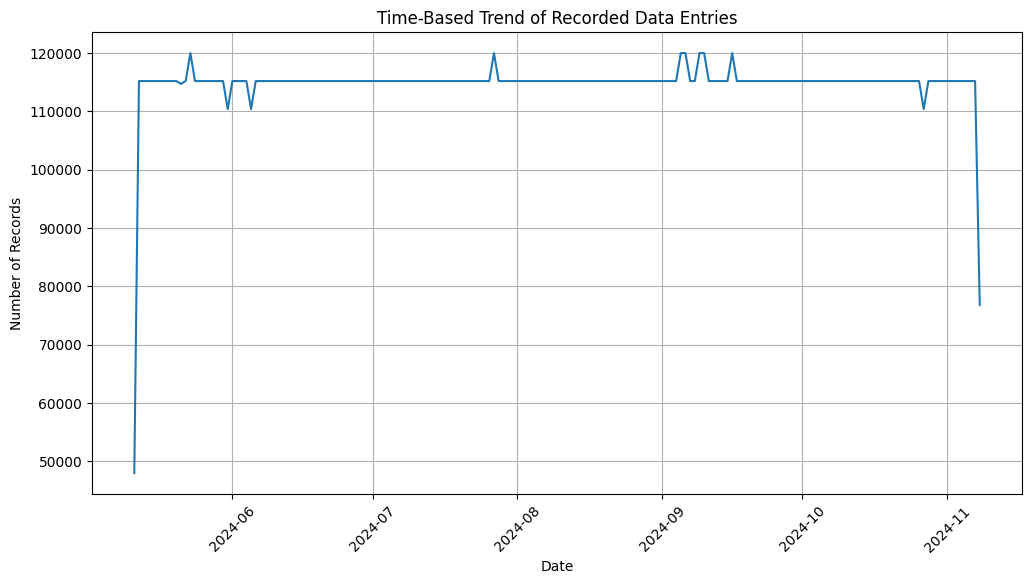

In [16]:
import matplotlib.pyplot as plt

# Set the plot size for better visibility
plt.figure(figsize=(12, 6))

# Plotting the count of records over time in the 'recorded_at' column
data['recorded_at'].dt.date.value_counts().sort_index().plot(kind='line')

# Setting up labels and title
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Time-Based Trend of Recorded Data Entries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [17]:

# Initial overview of the dataset
data_info = {
    'Shape': data.shape,
    'Columns': data.columns.tolist(),
    'Data Types': data.dtypes.to_dict(),
    'Missing Values': data.isnull().sum().to_dict()
}
data_info

{'Shape': (20879520, 5),
 'Columns': ['recorded_at',
  'station_id',
  'forecast_time',
  'parameter',
  'value'],
 'Data Types': {'recorded_at': dtype('<M8[ns]'),
  'station_id': dtype('int64'),
  'forecast_time': dtype('<M8[ns]'),
  'parameter': dtype('O'),
  'value': dtype('float64')},
 'Missing Values': {'recorded_at': 0,
  'station_id': 0,
  'forecast_time': 0,
  'parameter': 0,
  'value': 0}}

In [18]:
# Summarize basic statistics of numeric columns
numeric_summary = data.describe().to_dict()

numeric_summary


{'recorded_at': {'count': 20879520,
  'mean': Timestamp('2024-08-10 03:12:28.248509696'),
  'min': Timestamp('2024-05-11 15:02:31.830845'),
  '25%': Timestamp('2024-06-25 22:00:16.180462080'),
  '50%': Timestamp('2024-08-10 05:00:06.874983936'),
  '75%': Timestamp('2024-09-24 07:00:25.726301952'),
  'max': Timestamp('2024-11-08 15:00:17.507766'),
  'std': nan},
 'station_id': {'count': 20879520.0,
  'mean': 10661.995333226052,
  'min': 10384.0,
  '25%': 10554.0,
  '50%': 10714.0,
  '75%': 10776.0,
  'max': 10865.0,
  'std': 144.25578680305148},
 'forecast_time': {'count': 20879520,
  'mean': Timestamp('2024-08-15 02:42:01.671758592'),
  'min': Timestamp('2024-05-11 15:00:00'),
  '25%': Timestamp('2024-06-30 22:00:00'),
  '50%': Timestamp('2024-08-15 04:00:00'),
  '75%': Timestamp('2024-09-29 07:00:00'),
  'max': Timestamp('2024-11-18 14:00:00'),
  'std': nan},
 'value': {'count': 20879520.0,
  'mean': 144.73059429527137,
  'min': 0.0,
  '25%': 0.0,
  '50%': 142.275,
  '75%': 289.45,
  

In [20]:
# Zeige nur die ersten 10 eindeutigen Werte an, falls es viele gibt
for column in data.columns:
    unique_values = data[column].unique()[:10]
    print(f"Eindeutige Werte in der Spalte '{column}' (erste 10):")
    print(unique_values)
    print("\n")


Eindeutige Werte in der Spalte 'recorded_at' (erste 10):
<DatetimeArray>
['2024-05-12 15:00:17.390012', '2024-05-12 16:00:18.829261',
 '2024-05-12 17:00:20.624028', '2024-05-12 18:00:19.207758',
 '2024-05-12 19:00:19.758175', '2024-05-12 20:00:20.576626',
 '2024-05-12 21:00:18.446930', '2024-05-11 15:02:31.830845',
 '2024-05-11 15:03:48.939629', '2024-05-11 16:00:14.348392']
Length: 10, dtype: datetime64[ns]


Eindeutige Werte in der Spalte 'station_id' (erste 10):
[10513 10776 10803 10554 10555 10865 10384 10714 10727 10729]


Eindeutige Werte in der Spalte 'forecast_time' (erste 10):
<DatetimeArray>
['2024-05-12 15:00:00', '2024-05-12 16:00:00', '2024-05-12 17:00:00',
 '2024-05-12 18:00:00', '2024-05-12 19:00:00', '2024-05-12 20:00:00',
 '2024-05-12 21:00:00', '2024-05-12 22:00:00', '2024-05-12 23:00:00',
 '2024-05-13 00:00:00']
Length: 10, dtype: datetime64[ns]


Eindeutige Werte in der Spalte 'parameter' (erste 10):
['precipitation_height_significant_weather_last_1h'
 'temperature_

In [21]:

# Information über die Spalten und deren Datentypen
print("\nInformationen zum Datensatz:")
data.info()


Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20879520 entries, 0 to 20879519
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   recorded_at    datetime64[ns]
 1   station_id     int64         
 2   forecast_time  datetime64[ns]
 3   parameter      object        
 4   value          float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 796.5+ MB


In [22]:



# Fehlende Werte pro Spalte anzeigen
print("\nAnzahl der fehlenden Werte pro Spalte:")
data.isnull().sum()


Anzahl der fehlenden Werte pro Spalte:


recorded_at      0
station_id       0
forecast_time    0
parameter        0
value            0
dtype: int64

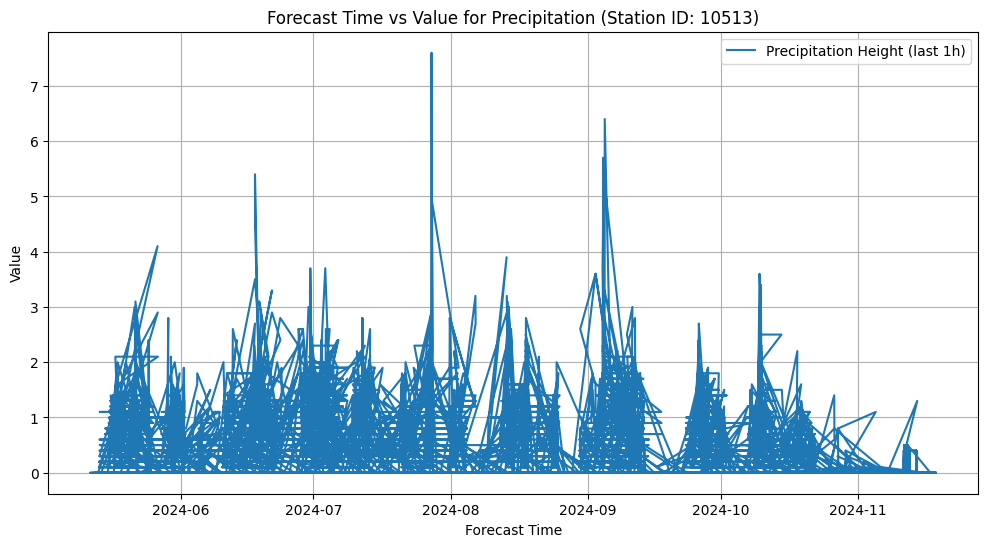

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter for a specific station_id, for example, 10513
station_id = 10513
filtered_data = data[data['station_id'] == station_id]

# Separate data for each parameter
parameter1_data = filtered_data[filtered_data['parameter'] == 'precipitation_height_significant_weather_last_1h']
parameter2_data = filtered_data[filtered_data['parameter'] == 'temperature_air_mean_200']

# Plot for 'precipitation_height_significant_weather_last_1h'
plt.figure(figsize=(12, 6))
plt.plot(parameter1_data['forecast_time'], parameter1_data['value'], label='Precipitation Height (last 1h)')
plt.title(f'Forecast Time vs Value for Precipitation (Station ID: {station_id})')
plt.xlabel('Forecast Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()




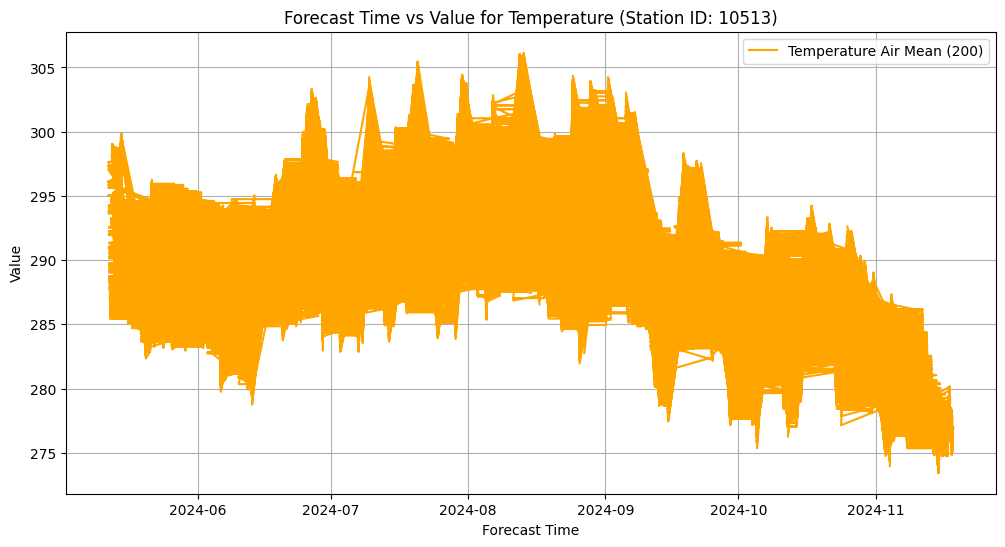

In [25]:
# Plot for 'temperature_air_mean_200'
plt.figure(figsize=(12, 6))
plt.plot(parameter2_data['forecast_time'], parameter2_data['value'], color='orange', label='Temperature Air Mean (200)')
plt.title(f'Forecast Time vs Value for Temperature (Station ID: {station_id})')
plt.xlabel('Forecast Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

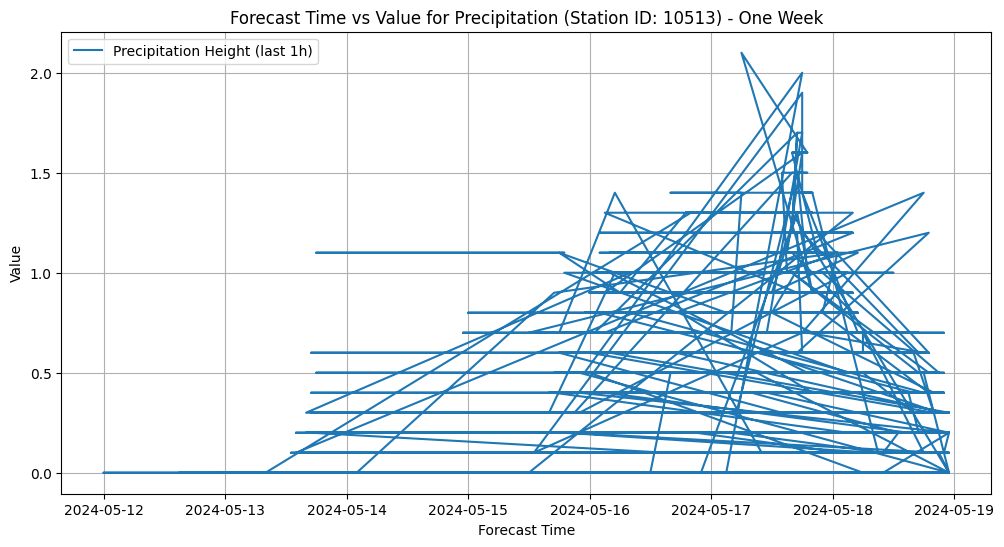

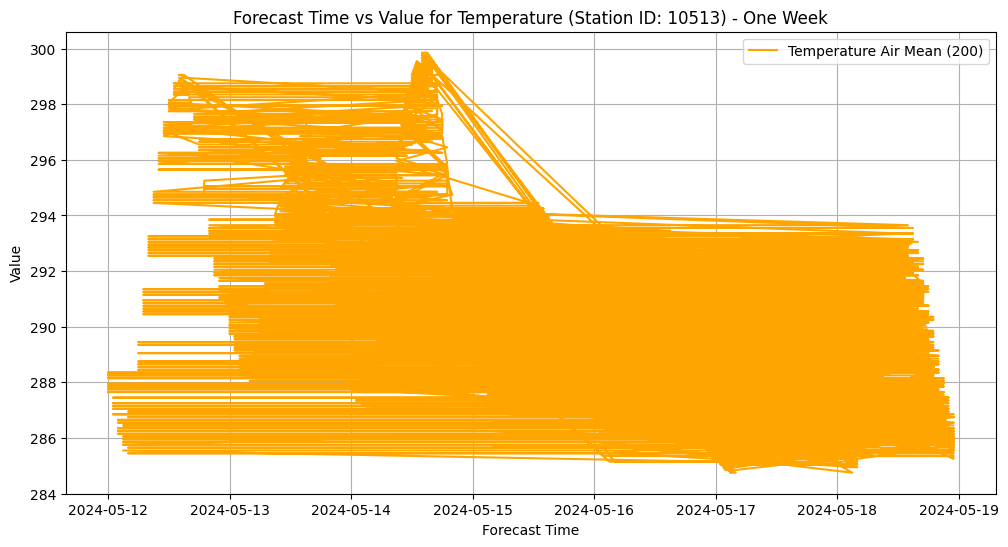

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the station ID and date range for one week
station_id = 10513
start_date = '2024-05-12'
end_date = '2024-05-19'

# Filter for the specific station_id and one-week date range
filtered_data = data[(data['station_id'] == station_id) &
                     (data['forecast_time'] >= start_date) &
                     (data['forecast_time'] < end_date)]

# Separate data for each parameter
parameter1_data = filtered_data[filtered_data['parameter'] == 'precipitation_height_significant_weather_last_1h']
parameter2_data = filtered_data[filtered_data['parameter'] == 'temperature_air_mean_200']

# Plot for 'precipitation_height_significant_weather_last_1h'
plt.figure(figsize=(12, 6))
plt.plot(parameter1_data['forecast_time'], parameter1_data['value'], label='Precipitation Height (last 1h)')
plt.title(f'Forecast Time vs Value for Precipitation (Station ID: {station_id}) - One Week')
plt.xlabel('Forecast Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Plot for 'temperature_air_mean_200'
plt.figure(figsize=(12, 6))
plt.plot(parameter2_data['forecast_time'], parameter2_data['value'], color='orange', label='Temperature Air Mean (200)')
plt.title(f'Forecast Time vs Value for Temperature (Station ID: {station_id}) - One Week')
plt.xlabel('Forecast Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [27]:
import pandas as pd

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Filter for the specific station_id, e.g., 10513
station_id = 10513
filtered_data = data[data['station_id'] == station_id]

# Add a column for the week number
filtered_data['week'] = filtered_data['forecast_time'].dt.isocalendar().week

# Get the maximum values of each parameter for each week
weekly_max = filtered_data.groupby(['week', 'parameter'])['value'].max().unstack()

# Display the weekly maximum values for both parameters
print("Maximum values of the two parameters for each week:")
print(weekly_max)


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2257045083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['week'] = filtered_data['forecast_time'].dt.isocalendar().week


Maximum values of the two parameters for each week:
parameter  precipitation_height_significant_weather_last_1h  \
week                                                          
19                                                      0.0   
20                                                      2.1   
21                                                      4.1   
22                                                      2.8   
23                                                      1.8   
24                                                      2.6   
25                                                      5.4   
26                                                      3.7   
27                                                      3.7   
28                                                      2.8   
29                                                      2.0   
30                                                      7.6   
31                                                      2.8   
32 

C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2123475636.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['week'] = filtered_data['forecast_time'].dt.isocalendar().week


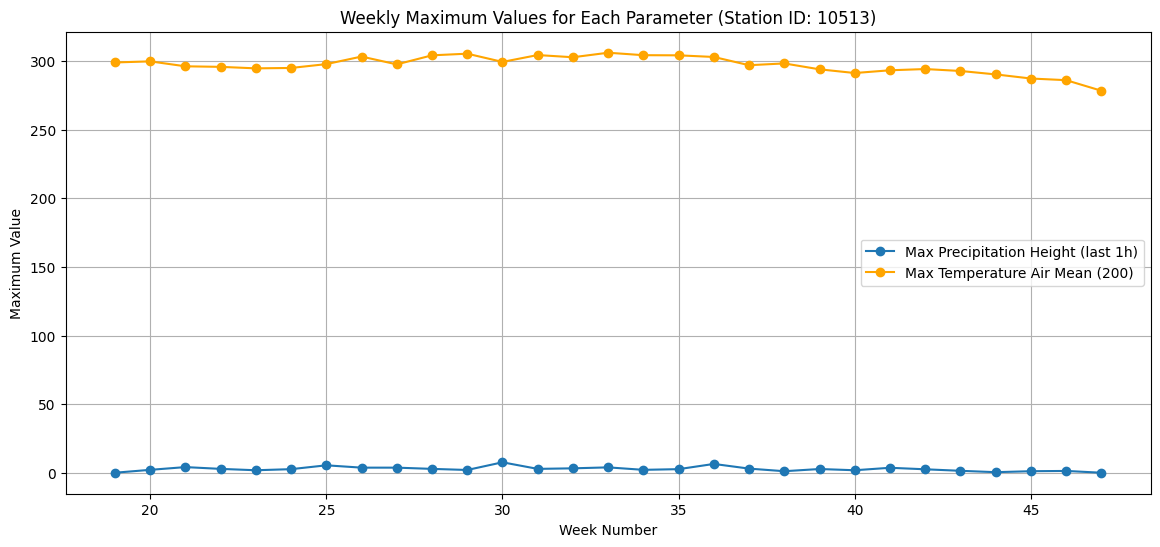

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Filter for the specific station_id, e.g., 10513
station_id = 10513
filtered_data = data[data['station_id'] == station_id]

# Add a column for the week number
filtered_data['week'] = filtered_data['forecast_time'].dt.isocalendar().week

# Get the maximum values of each parameter for each week
weekly_max = filtered_data.groupby(['week', 'parameter'])['value'].max().unstack()

# Plot the maximum values per week for each parameter
plt.figure(figsize=(14, 6))

# Plot for 'precipitation_height_significant_weather_last_1h'
plt.plot(weekly_max.index, 
         weekly_max['precipitation_height_significant_weather_last_1h'], 
         label='Max Precipitation Height (last 1h)', marker='o')

# Plot for 'temperature_air_mean_200'
plt.plot(weekly_max.index, 
         weekly_max['temperature_air_mean_200'], 
         label='Max Temperature Air Mean (200)', marker='o', color='orange')

# Plot settings
plt.title(f'Weekly Maximum Values for Each Parameter (Station ID: {station_id})')
plt.xlabel('Week Number')
plt.ylabel('Maximum Value')
plt.legend()
plt.grid(True)
plt.show()


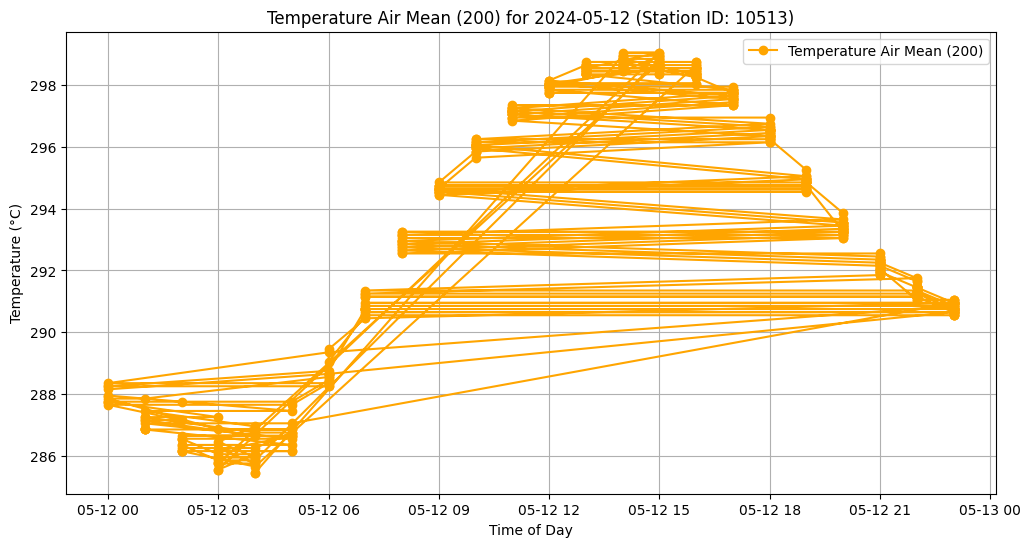

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID and date for the desired day
station_id = 10513
selected_date = '2024-05-12'

# Filter data for the specific station_id and selected date
daily_data = data[(data['station_id'] == station_id) &
                  (data['parameter'] == 'temperature_air_mean_200') &
                  (data['forecast_time'].dt.date == pd.to_datetime(selected_date).date())]

# Plot temperature values throughout the day
plt.figure(figsize=(12, 6))
plt.plot(daily_data['forecast_time'], daily_data['value'], marker='o', color='orange', label='Temperature Air Mean (200)')
plt.title(f'Temperature Air Mean (200) for {selected_date} (Station ID: {station_id})')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


Temperature in Celsius=Temperature in Kelvin−273.15

C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\1153461444.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['value'] = daily_data['value'] - 273.15


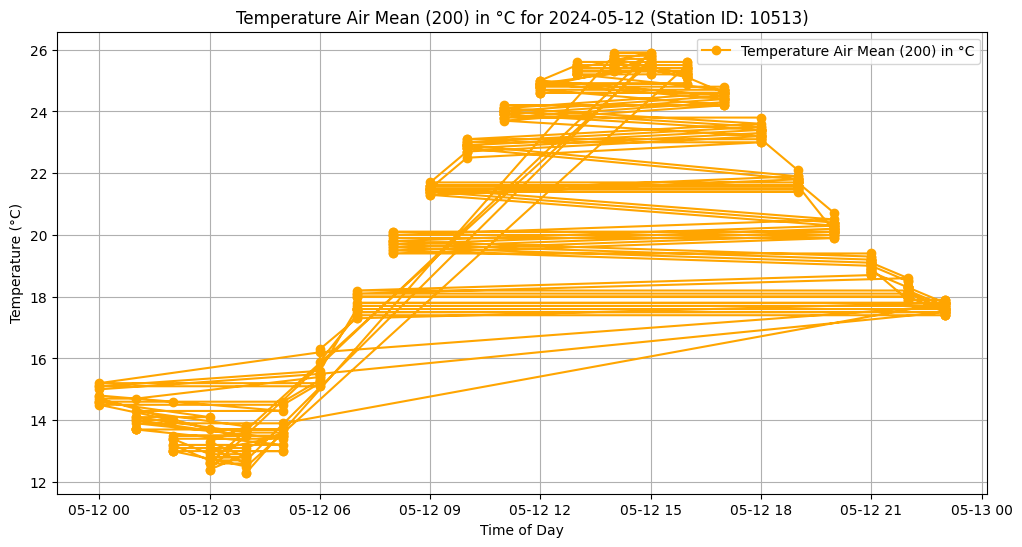

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID and date for the desired day
station_id = 10513
selected_date = '2024-05-12'

# Filter data for the specific station_id and selected date
daily_data = data[(data['station_id'] == station_id) &
                  (data['parameter'] == 'temperature_air_mean_200') &
                  (data['forecast_time'].dt.date == pd.to_datetime(selected_date).date())]

# Convert temperature from Kelvin to Celsius
daily_data['value'] = daily_data['value'] - 273.15

# Plot temperature values throughout the day in Celsius
plt.figure(figsize=(12, 6))
plt.plot(daily_data['forecast_time'], daily_data['value'], marker='o', color='orange', label='Temperature Air Mean (200) in °C')
plt.title(f'Temperature Air Mean (200) in °C for {selected_date} (Station ID: {station_id})')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2239603270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['value'] = temperature_data['value'] - 273.15
C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2239603270.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['date'] = temperature_data['forecast_time'].dt.date
C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2239603270.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

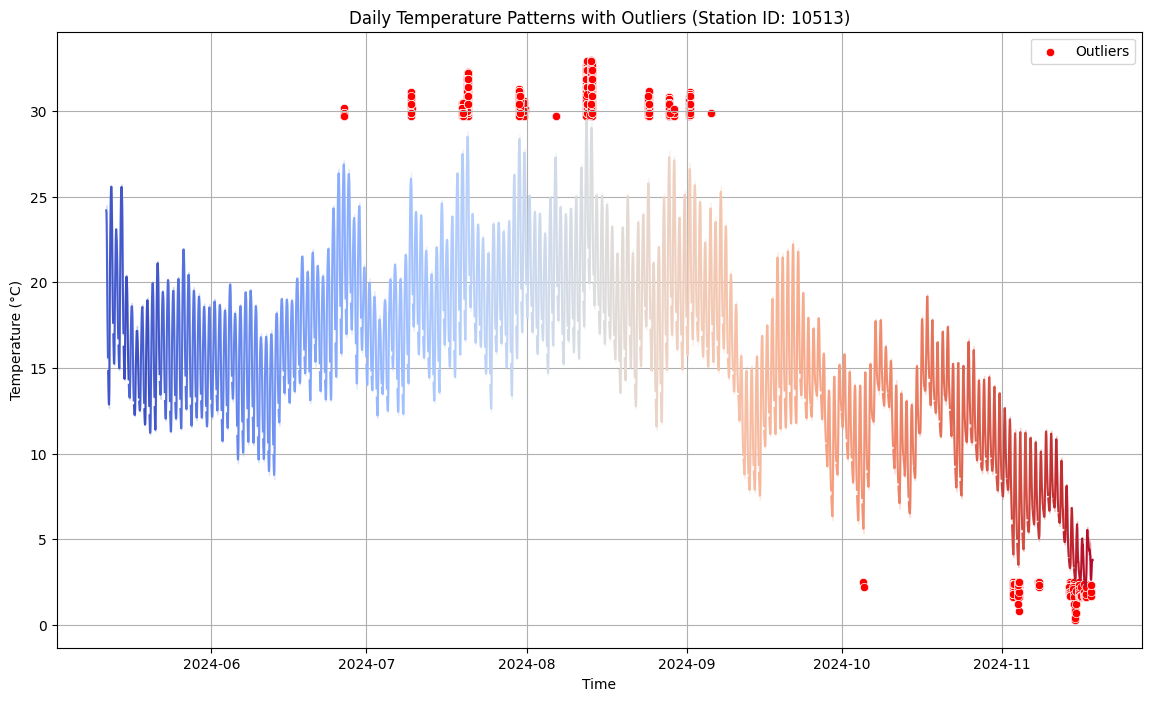

Daily Temperature Statistics:
             min   max       mean  median       std   IQR
date                                                     
2024-05-11  15.3  24.5  19.051852   18.05  2.999858   9.2
2024-05-12  12.3  25.9  20.562778   21.40  4.113127  13.6
2024-05-13  14.8  24.2  19.385573   19.40  2.680589   9.4
2024-05-14  13.9  26.7  20.616352   20.70  3.829981  12.8
2024-05-15  12.5  21.3  17.244146   17.00  2.191740   8.8
...          ...   ...        ...     ...       ...   ...
2024-11-14   1.6   7.9   4.565452    4.20  1.426393   6.3
2024-11-15   0.3   7.3   3.785478    3.60  1.428225   7.0
2024-11-16   1.6   6.4   3.514968    3.30  1.085880   4.8
2024-11-17   1.6   7.0   3.556212    3.45  1.447401   5.4
2024-11-18   1.7   5.3   3.671667    3.80  1.241657   3.6

[192 rows x 6 columns]

Outliers:
               forecast_time  value
5037064  2024-06-26 15:00:00   30.1
5037065  2024-06-26 15:00:00   30.1
5037066  2024-06-26 15:00:00   30.1
5038880  2024-06-26 16:00:00   29.8
5

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id and the 'temperature_air_mean_200' parameter
temperature_data = data[(data['station_id'] == station_id) & 
                        (data['parameter'] == 'temperature_air_mean_200')]

# Convert temperature from Kelvin to Celsius
temperature_data['value'] = temperature_data['value'] - 273.15

# Add a column for the date only (to group by day)
temperature_data['date'] = temperature_data['forecast_time'].dt.date

# Calculate daily statistics to identify potential outliers
daily_stats = temperature_data.groupby('date')['value'].agg(['min', 'max', 'mean', 'median', 'std'])
daily_stats['IQR'] = daily_stats['max'] - daily_stats['min']

# Detect outliers based on the IQR rule (values outside 1.5 * IQR)
q1 = temperature_data['value'].quantile(0.25)
q3 = temperature_data['value'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr
temperature_data['outlier'] = (temperature_data['value'] < outlier_threshold_low) | (temperature_data['value'] > outlier_threshold_high)

# Plot daily temperature patterns with outliers highlighted
plt.figure(figsize=(14, 8))
sns.lineplot(data=temperature_data, x='forecast_time', y='value', hue='date', palette='coolwarm', legend=False)
sns.scatterplot(data=temperature_data[temperature_data['outlier']], x='forecast_time', y='value', color='red', label='Outliers')
plt.title(f'Daily Temperature Patterns with Outliers (Station ID: {station_id})')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Print summary of detected outliers and daily stats
print("Daily Temperature Statistics:")
print(daily_stats)
print("\nOutliers:")
print(temperature_data[temperature_data['outlier']][['forecast_time', 'value']])


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\4149369236.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['value'] = temperature_data['value'] - 273.15
C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\4149369236.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['date'] = temperature_data['forecast_time'].dt.date


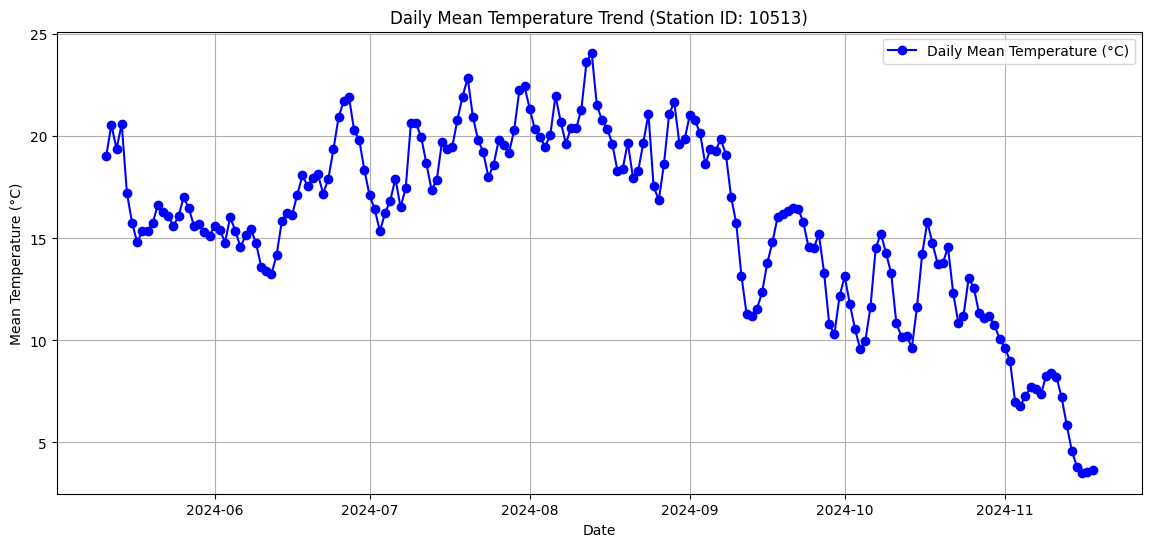

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id and 'temperature_air_mean_200' parameter
temperature_data = data[(data['station_id'] == station_id) & 
                        (data['parameter'] == 'temperature_air_mean_200')]

# Convert temperature from Kelvin to Celsius
temperature_data['value'] = temperature_data['value'] - 273.15

# Add a column for the date only (to group by day)
temperature_data['date'] = temperature_data['forecast_time'].dt.date

# Calculate the mean temperature for each day
daily_mean_temperatures = temperature_data.groupby('date')['value'].mean()

# Plot the daily mean temperatures to identify a trend
plt.figure(figsize=(14, 6))
plt.plot(daily_mean_temperatures.index, daily_mean_temperatures.values, marker='o', color='blue', label='Daily Mean Temperature (°C)')
plt.title(f'Daily Mean Temperature Trend (Station ID: {station_id})')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import pandas as pd

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id
station_data = data[data['station_id'] == station_id]

# Count the number of unique months in the data
station_data['month'] = station_data['forecast_time'].dt.to_period('M')
unique_months = station_data['month'].nunique()
print(f"Number of unique months in the dataset: {unique_months}")

# Count the number of timestamps per day
station_data['date'] = station_data['forecast_time'].dt.date
timestamps_per_day = station_data.groupby('date').size()

# Display the average and unique number of timestamps per day
average_timestamps_per_day = timestamps_per_day.mean()
unique_timestamps_per_day = timestamps_per_day.unique()

print(f"Average number of timestamps per day: {average_timestamps_per_day}")
print(f"Unique counts of timestamps per day: {unique_timestamps_per_day}")


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\3566888020.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['month'] = station_data['forecast_time'].dt.to_period('M')


Number of unique months in the dataset: 7
Average number of timestamps per day: 10875.0
Unique counts of timestamps per day: [  108  1080  2232  3388  4544  5688  6840  7992  9144 10296 11340 11520
 11562 11564 11560 11568 11576 11542 11478 11472 11428 11424 11416 11450
 11470 11516 11522 11570 11572 11518 11538 11574 11616 11614 11634 11680
 11712 11710 11694 11678 11664 11646 11600 11548 11474 11448 10536  9384
  8232  7080  5928  4776  3622  2472  1320   240]


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\3566888020.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['date'] = station_data['forecast_time'].dt.date


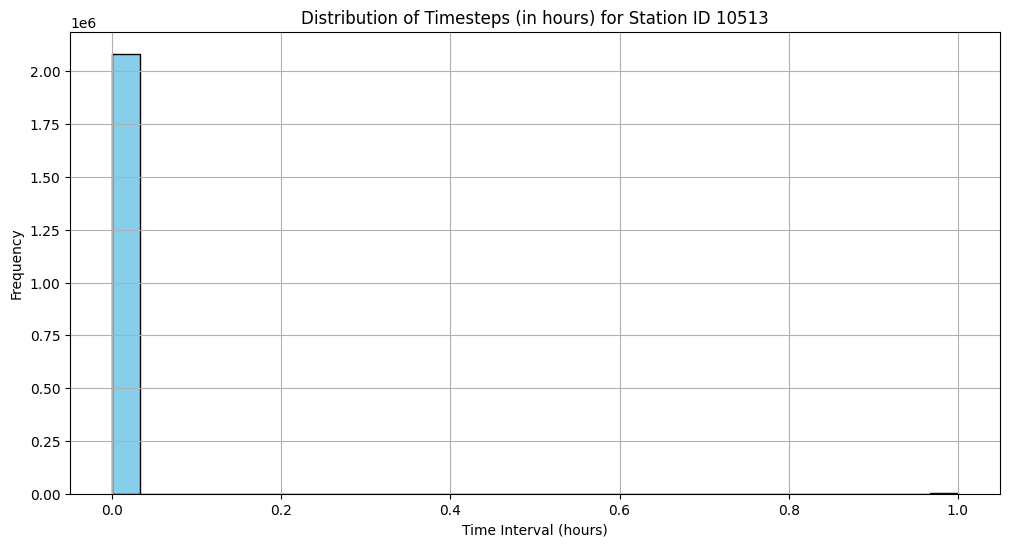

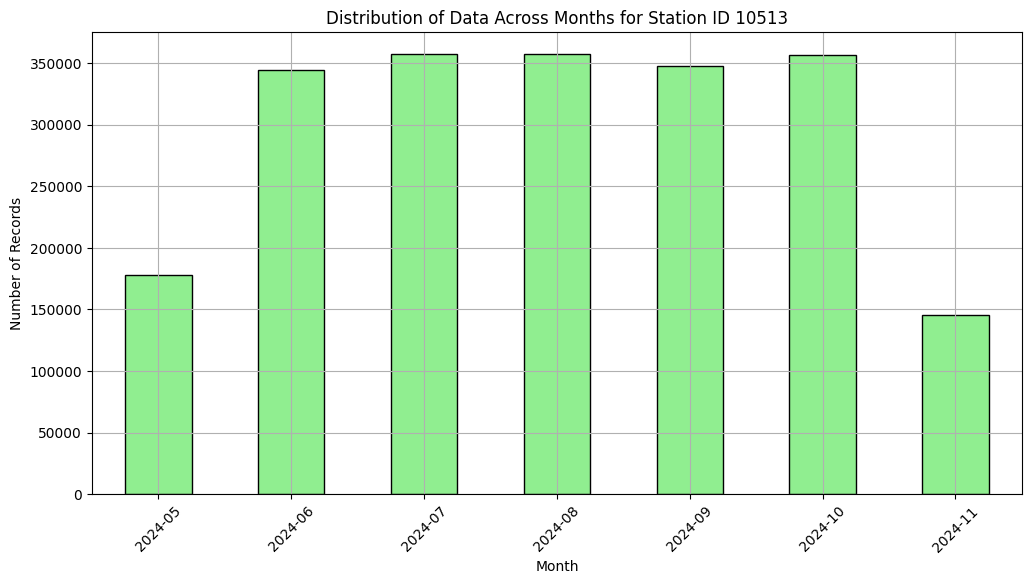

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id and sort by timestamp
station_data = data[data['station_id'] == station_id].sort_values(by='forecast_time')

# Calculate time intervals (timesteps) between consecutive measurements
station_data['timestep'] = station_data['forecast_time'].diff().dt.total_seconds() / 3600  # Convert seconds to hours

# Plot the distribution of timesteps
plt.figure(figsize=(12, 6))
plt.hist(station_data['timestep'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Timesteps (in hours) for Station ID {station_id}')
plt.xlabel('Time Interval (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Extract the month and year for monthly analysis
station_data['month'] = station_data['forecast_time'].dt.to_period('M')

# Count the number of records per month
monthly_counts = station_data.groupby('month').size()

# Plot the data distribution across months
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title(f'Distribution of Data Across Months for Station ID {station_id}')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\3557285773.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['date'] = station_data['forecast_time'].dt.date


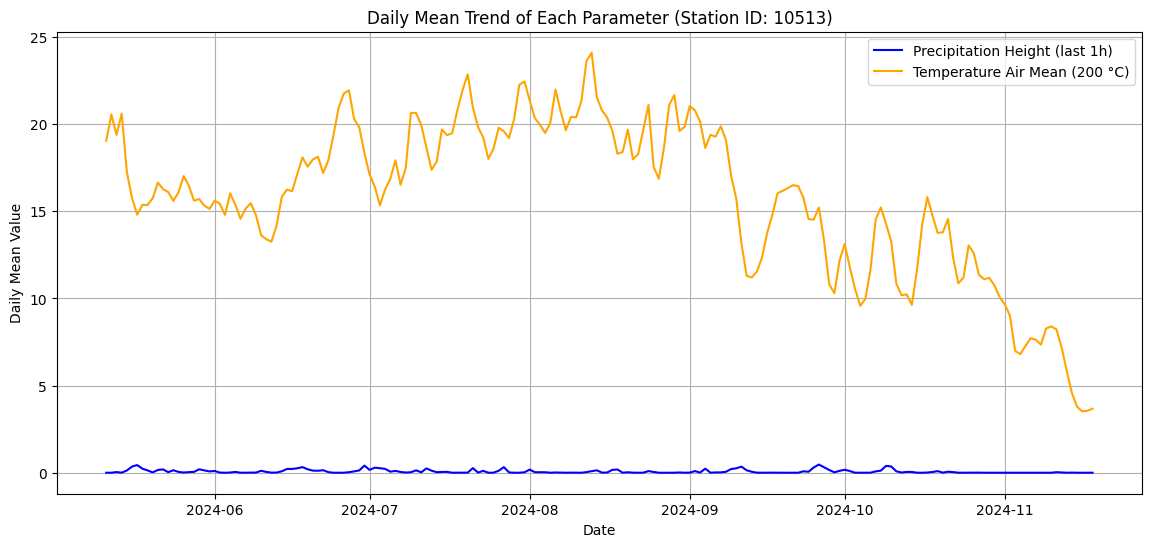

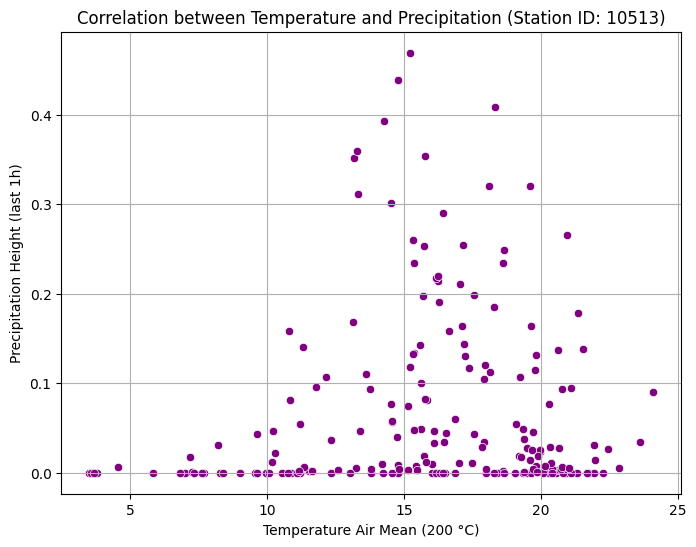

Correlation between Temperature and Precipitation: 0.09


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id
station_data = data[data['station_id'] == station_id]

# Convert temperature from Kelvin to Celsius if necessary
station_data.loc[station_data['parameter'] == 'temperature_air_mean_200', 'value'] -= 273.15

# Calculate daily mean for each parameter
station_data['date'] = station_data['forecast_time'].dt.date
daily_means = station_data.groupby(['date', 'parameter'])['value'].mean().unstack()

# Plot trends for each parameter
plt.figure(figsize=(14, 6))
plt.plot(daily_means.index, daily_means['precipitation_height_significant_weather_last_1h'], label='Precipitation Height (last 1h)', color='blue')
plt.plot(daily_means.index, daily_means['temperature_air_mean_200'], label='Temperature Air Mean (200 °C)', color='orange')
plt.title(f'Daily Mean Trend of Each Parameter (Station ID: {station_id})')
plt.xlabel('Date')
plt.ylabel('Daily Mean Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot correlation between the two parameters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_means, x='temperature_air_mean_200', y='precipitation_height_significant_weather_last_1h', color='purple')
plt.title(f'Correlation between Temperature and Precipitation (Station ID: {station_id})')
plt.xlabel('Temperature Air Mean (200 °C)')
plt.ylabel('Precipitation Height (last 1h)')
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation = daily_means.corr().loc['temperature_air_mean_200', 'precipitation_height_significant_weather_last_1h']
print(f"Correlation between Temperature and Precipitation: {correlation:.2f}")


In [42]:
!python -m pip install --upgrade pip setuptools wheel


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 487.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.8 MB 563.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 653.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 554.9 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 612.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 619.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 655.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.8 MB 654.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 701.4 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.8 MB 746.0 kB/s eta 0:00:02
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [43]:
!pip install statsmodels --trusted-host pypi.org --trusted-host files.pythonhosted.org


Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 985.5 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.9 MB 985.5 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.9 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.9 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.9 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.9 MB 1.2 MB/s eta 0:00:07
   -------- -----------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\MiniConda\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\MiniConda\Lib\socke

In [44]:
!pip cache purge


Files removed: 739


In [45]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.9 MB/s eta 0:00:05


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\MiniConda\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\MiniConda\Lib\socke

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose temperature data (assuming daily frequency)
decomposition = seasonal_decompose(daily_means['temperature_air_mean_200'], model='additive', period=30)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily Temperature')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot for temperature
plt.figure(figsize=(12, 6))
plot_acf(daily_means['temperature_air_mean_200'].dropna(), lags=30)
plt.title('Autocorrelation of Daily Mean Temperature')
plt.show()

# Partial autocorrelation plot for temperature
plt.figure(figsize=(12, 6))
plot_pacf(daily_means['temperature_air_mean_200'].dropna(), lags=30)
plt.title('Partial Autocorrelation of Daily Mean Temperature')
plt.show()

# Rolling mean plot (7-day window) for temperature
plt.figure(figsize=(14, 6))
daily_means['temperature_air_mean_200'].rolling(window=7).mean().plot(label='7-Day Rolling Mean (Temperature)', color='orange')
daily_means['precipitation_height_significant_weather_last_1h'].rolling(window=7).mean().plot(label='7-Day Rolling Mean (Precipitation)', color='blue')
plt.title('7-Day Rolling Mean for Temperature and Precipitation')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()



ModuleNotFoundError: No module named 'statsmodels'

C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2192260557.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['date'] = station_data['forecast_time'].dt.date


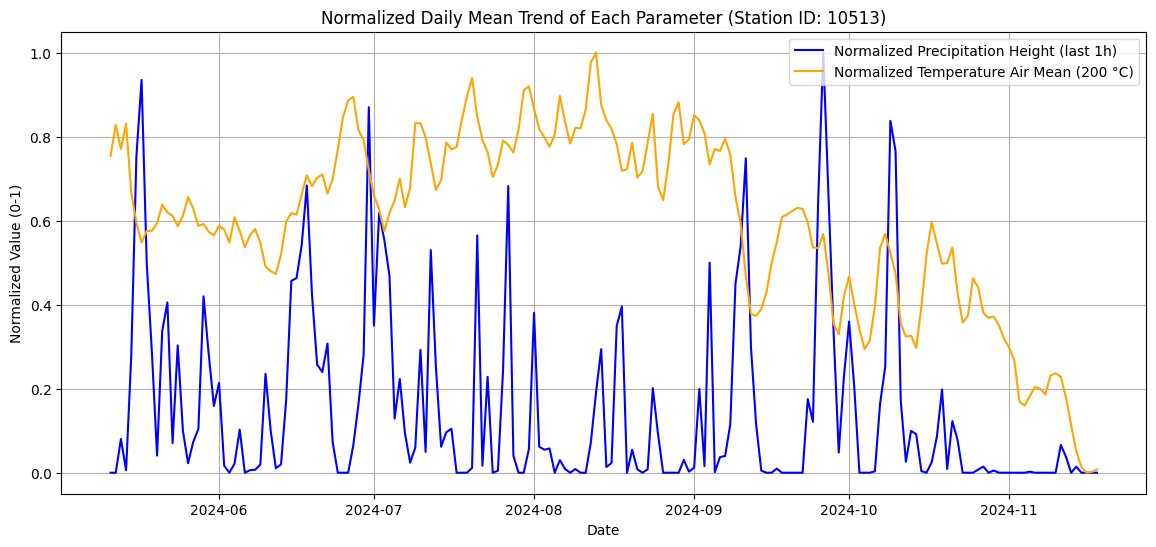

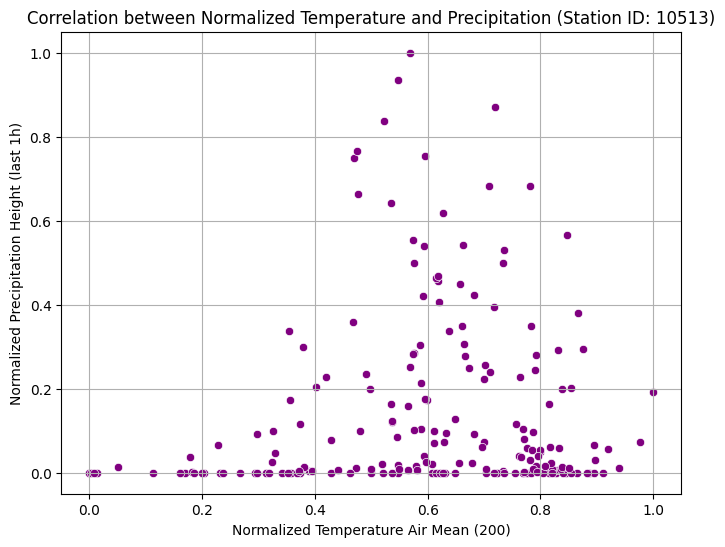

Correlation between Normalized Temperature and Precipitation: 0.09


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id
station_data = data[data['station_id'] == station_id]

# Convert temperature from Kelvin to Celsius if necessary
station_data.loc[station_data['parameter'] == 'temperature_air_mean_200', 'value'] -= 273.15

# Calculate daily mean for each parameter
station_data['date'] = station_data['forecast_time'].dt.date
daily_means = station_data.groupby(['date', 'parameter'])['value'].mean().unstack()

# Apply Min-Max Scaling (Normalization) between 0 and 1
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(daily_means), columns=daily_means.columns, index=daily_means.index)

# Plot the normalized values over time
plt.figure(figsize=(14, 6))
plt.plot(normalized_data.index, normalized_data['precipitation_height_significant_weather_last_1h'], label='Normalized Precipitation Height (last 1h)', color='blue')
plt.plot(normalized_data.index, normalized_data['temperature_air_mean_200'], label='Normalized Temperature Air Mean (200 °C)', color='orange')
plt.title(f'Normalized Daily Mean Trend of Each Parameter (Station ID: {station_id})')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True)
plt.show()

# Plot correlation between the normalized parameters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=normalized_data, x='temperature_air_mean_200', y='precipitation_height_significant_weather_last_1h', color='purple')
plt.title(f'Correlation between Normalized Temperature and Precipitation (Station ID: {station_id})')
plt.xlabel('Normalized Temperature Air Mean (200)')
plt.ylabel('Normalized Precipitation Height (last 1h)')
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
normalized_correlation = normalized_data.corr().loc['temperature_air_mean_200', 'precipitation_height_significant_weather_last_1h']
print(f"Correlation between Normalized Temperature and Precipitation: {normalized_correlation:.2f}")


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\2139789068.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['date'] = station_data['forecast_time'].dt.date


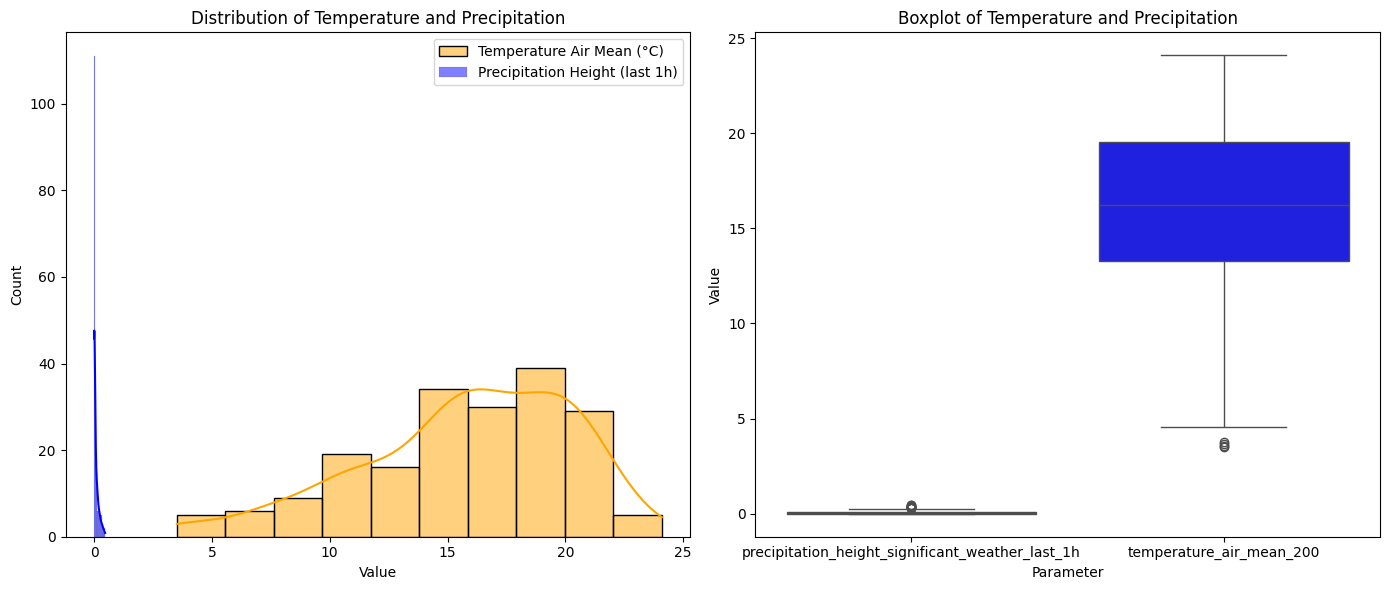

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.utils import resample

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id
station_data = data[data['station_id'] == station_id]

# Convert temperature from Kelvin to Celsius if necessary
station_data.loc[station_data['parameter'] == 'temperature_air_mean_200', 'value'] -= 273.15

# Calculate daily means for each parameter
station_data['date'] = station_data['forecast_time'].dt.date
daily_means = station_data.groupby(['date', 'parameter'])['value'].mean().unstack()

# Basic Statistical Analysis - Distribution and Boxplots
plt.figure(figsize=(14, 6))

# Histogram for each parameter
plt.subplot(1, 2, 1)
sns.histplot(daily_means['temperature_air_mean_200'], kde=True, color='orange', label='Temperature Air Mean (°C)')
sns.histplot(daily_means['precipitation_height_significant_weather_last_1h'], kde=True, color='blue', label='Precipitation Height (last 1h)')
plt.title("Distribution of Temperature and Precipitation")
plt.xlabel("Value")
plt.legend()

# Boxplot for each parameter
plt.subplot(1, 2, 2)
sns.boxplot(data=daily_means, palette=['orange', 'blue'])
plt.title("Boxplot of Temperature and Precipitation")
plt.xlabel("Parameter")
plt.ylabel("Value")

plt.tight_layout()
plt.show()




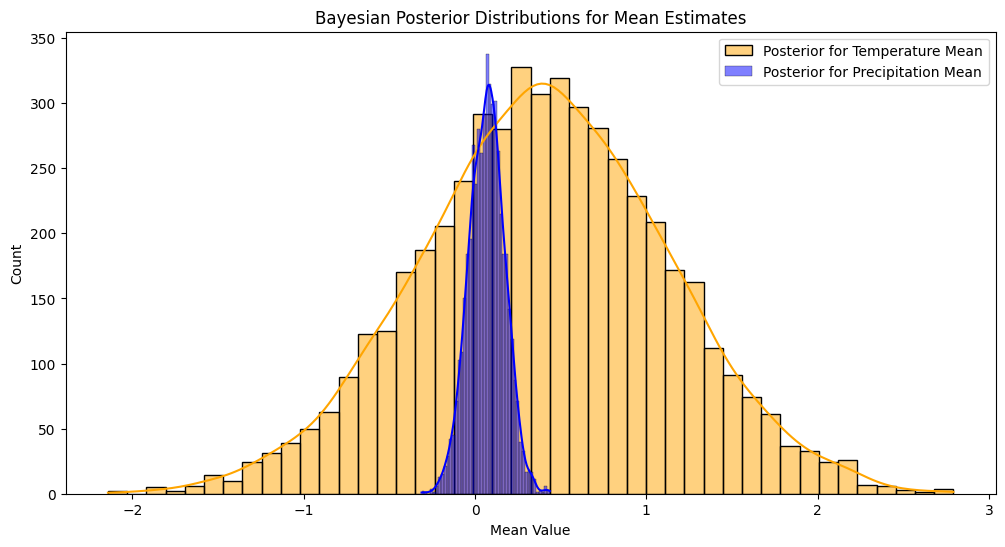

In [49]:
# Bayesian Analysis - Estimating Mean with Credible Intervals
def bayesian_estimate(data, prior_mean=0, prior_sd=10, n_iter=5000):
    # Using Normal distribution for prior and likelihood
    likelihood_sd = np.std(data)
    sample_mean = np.mean(data)
    posterior_sd = np.sqrt((prior_sd**2 * likelihood_sd**2) / (prior_sd**2 + len(data) * likelihood_sd**2))
    posterior_mean = (prior_mean / prior_sd**2 + sample_mean / likelihood_sd**2) * posterior_sd**2
    posterior_samples = norm.rvs(posterior_mean, posterior_sd, size=n_iter)
    return posterior_mean, posterior_sd, posterior_samples

# Bayesian estimation for each parameter
temp_mean, temp_sd, temp_samples = bayesian_estimate(daily_means['temperature_air_mean_200'].dropna())
precip_mean, precip_sd, precip_samples = bayesian_estimate(daily_means['precipitation_height_significant_weather_last_1h'].dropna())

# Plot posterior distributions
plt.figure(figsize=(12, 6))
sns.histplot(temp_samples, kde=True, color='orange', label='Posterior for Temperature Mean')
sns.histplot(precip_samples, kde=True, color='blue', label='Posterior for Precipitation Mean')
plt.title("Bayesian Posterior Distributions for Mean Estimates")
plt.xlabel("Mean Value")
plt.legend()
plt.show()


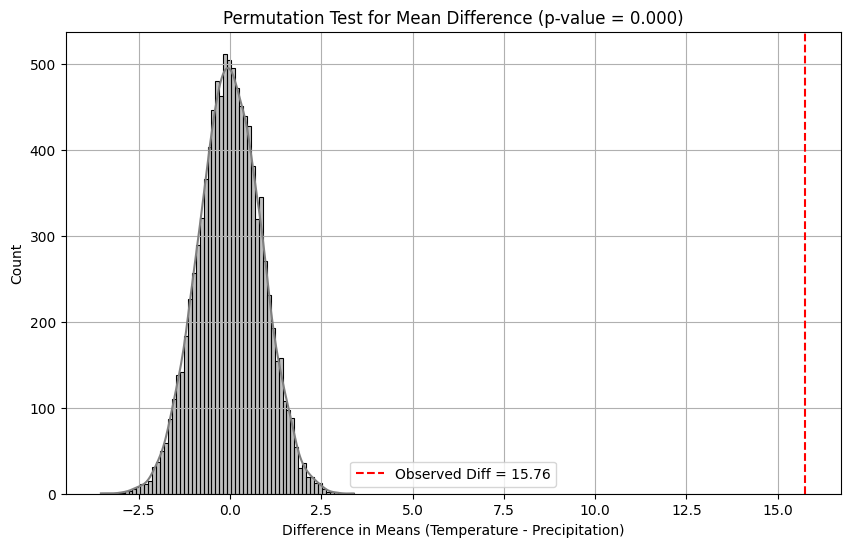

In [50]:
# Permutation Test to Assess Difference in Means
observed_diff = np.mean(daily_means['temperature_air_mean_200'].dropna()) - np.mean(daily_means['precipitation_height_significant_weather_last_1h'].dropna())
n_permutations = 10000
permutation_diffs = []

# Combine data and permute
combined_data = np.concatenate((daily_means['temperature_air_mean_200'].dropna(), daily_means['precipitation_height_significant_weather_last_1h'].dropna()))
for _ in range(n_permutations):
    permuted_data = np.random.permutation(combined_data)
    permuted_temp = permuted_data[:len(daily_means['temperature_air_mean_200'].dropna())]
    permuted_precip = permuted_data[len(daily_means['temperature_air_mean_200'].dropna()):]
    permutation_diffs.append(np.mean(permuted_temp) - np.mean(permuted_precip))

# Calculate p-value
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

# Plot permutation test results
plt.figure(figsize=(10, 6))
sns.histplot(permutation_diffs, kde=True, color='gray')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff = {observed_diff:.2f}')
plt.title(f'Permutation Test for Mean Difference (p-value = {p_value:.3f})')
plt.xlabel('Difference in Means (Temperature - Precipitation)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\3993505162.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['date'] = station_data['forecast_time'].dt.date


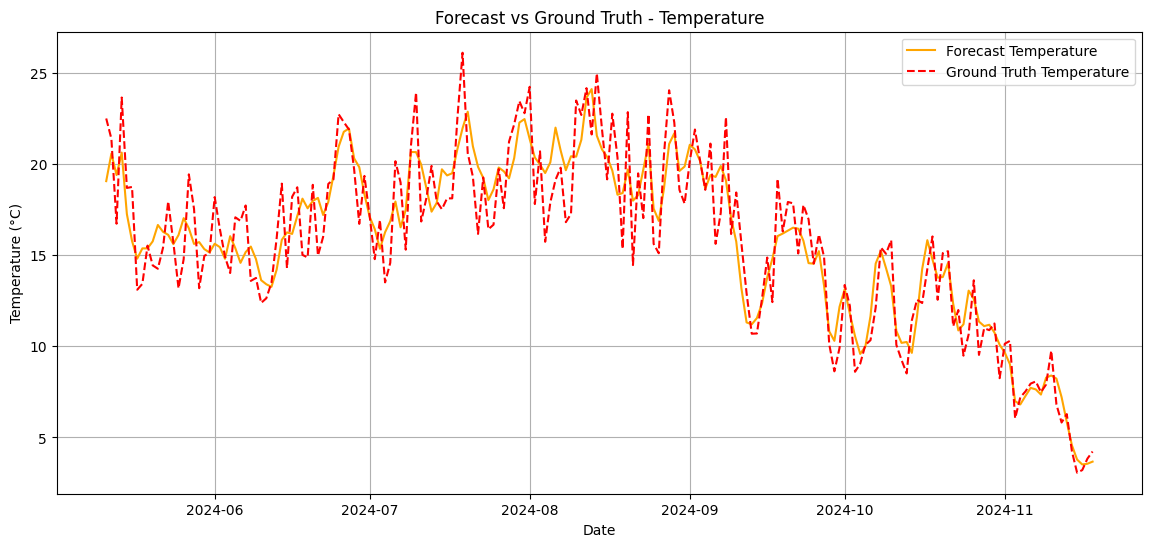

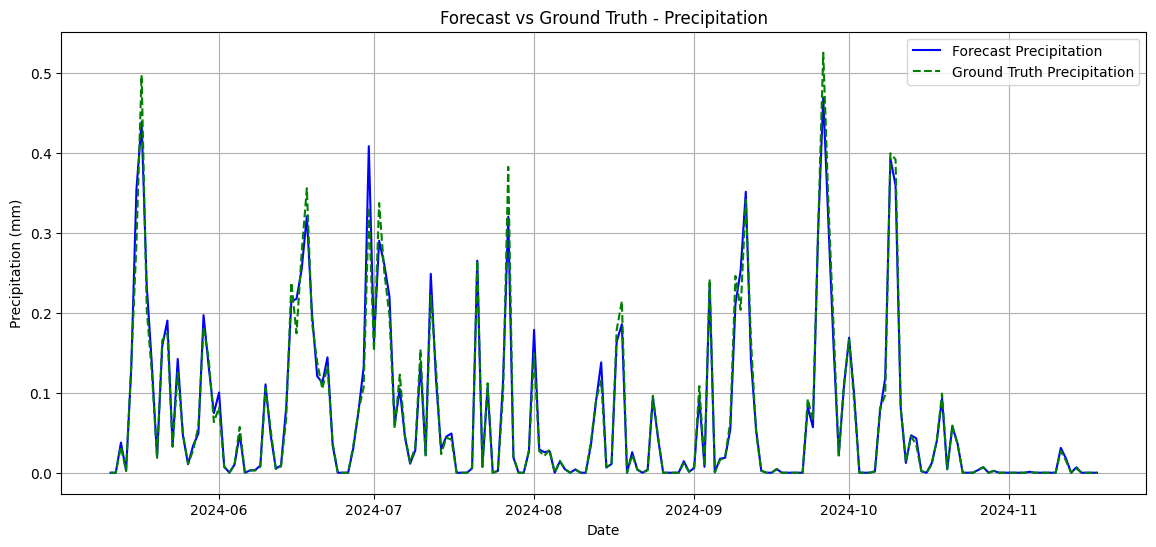

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure 'forecast_time' is in datetime format
data['forecast_time'] = pd.to_datetime(data['forecast_time'])

# Define the station ID for analysis
station_id = 10513

# Filter data for the specific station_id
station_data = data[data['station_id'] == station_id]

# Convert temperature from Kelvin to Celsius if necessary
station_data.loc[station_data['parameter'] == 'temperature_air_mean_200', 'value'] -= 273.15

# Calculate daily means for each parameter as forecast data
station_data['date'] = station_data['forecast_time'].dt.date
daily_means = station_data.groupby(['date', 'parameter'])['value'].mean().unstack()

# Generate artificial ground truth data by adjusting forecast data by a random percentage between 5-20%
np.random.seed(42)
adjustment_factors = 1 + np.random.uniform(-0.2, 0.2, daily_means.shape)
ground_truth_data = daily_means * adjustment_factors
ground_truth_data.columns = ['ground_truth_precipitation', 'ground_truth_temperature']

# Combine forecast and ground truth data
combined_data = daily_means.rename(columns={
    'precipitation_height_significant_weather_last_1h': 'forecast_precipitation',
    'temperature_air_mean_200': 'forecast_temperature'
})
combined_data = combined_data.join(ground_truth_data)

# Plot forecast vs. ground truth for each parameter
plt.figure(figsize=(14, 6))
plt.plot(combined_data.index, combined_data['forecast_temperature'], label='Forecast Temperature', color='orange')
plt.plot(combined_data.index, combined_data['ground_truth_temperature'], label='Ground Truth Temperature', color='red', linestyle='--')
plt.title('Forecast vs Ground Truth - Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(combined_data.index, combined_data['forecast_precipitation'], label='Forecast Precipitation', color='blue')
plt.plot(combined_data.index, combined_data['ground_truth_precipitation'], label='Ground Truth Precipitation', color='green', linestyle='--')
plt.title('Forecast vs Ground Truth - Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

Correlation Matrix:
                            forecast_temperature  ground_truth_temperature  \
forecast_temperature                    1.000000                  0.923252   
ground_truth_temperature                0.923252                  1.000000   
forecast_precipitation                  0.092235                  0.113391   
ground_truth_precipitation              0.087773                  0.104979   

                            forecast_precipitation  ground_truth_precipitation  
forecast_temperature                      0.092235                    0.087773  
ground_truth_temperature                  0.113391                    0.104979  
forecast_precipitation                    1.000000                    0.989396  
ground_truth_precipitation                0.989396                    1.000000  


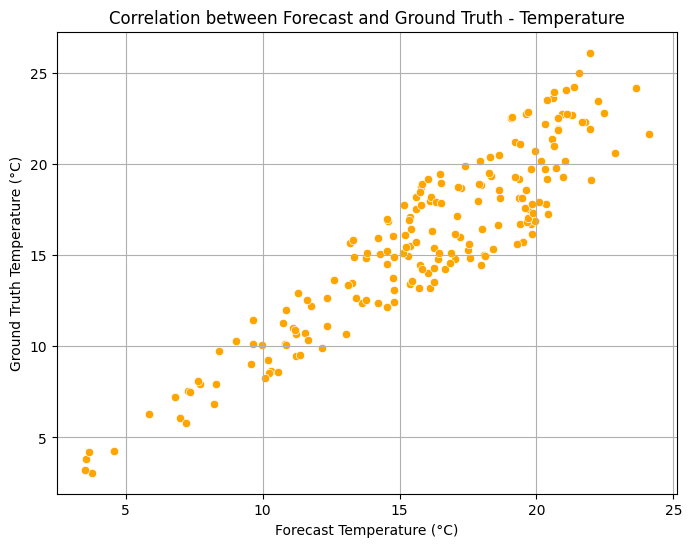

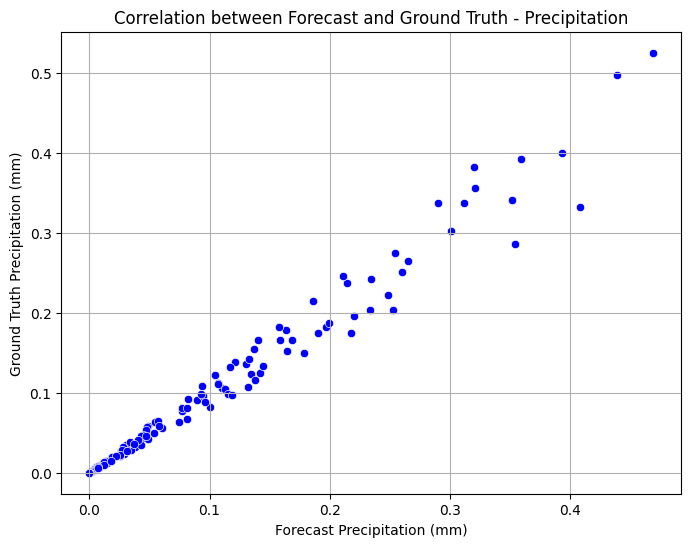

In [52]:
# Calculate the difference between forecast and ground truth
combined_data['temperature_diff'] = combined_data['ground_truth_temperature'] - combined_data['forecast_temperature']
combined_data['precipitation_diff'] = combined_data['ground_truth_precipitation'] - combined_data['forecast_precipitation']

# Correlation analysis
correlation = combined_data[['forecast_temperature', 'ground_truth_temperature', 'forecast_precipitation', 'ground_truth_precipitation']].corr()
print("Correlation Matrix:")
print(correlation)

# Scatter plot to show correlation between forecast and ground truth
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_data['forecast_temperature'], y=combined_data['ground_truth_temperature'], color='orange')
plt.title('Correlation between Forecast and Ground Truth - Temperature')
plt.xlabel('Forecast Temperature (°C)')
plt.ylabel('Ground Truth Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_data['forecast_precipitation'], y=combined_data['ground_truth_precipitation'], color='blue')
plt.title('Correlation between Forecast and Ground Truth - Precipitation')
plt.xlabel('Forecast Precipitation (mm)')
plt.ylabel('Ground Truth Precipitation (mm)')
plt.grid(True)
plt.show()


Linear Regression Model - Mean Squared Error: 1.25
Linear Regression Model - R^2 Score: -0.02


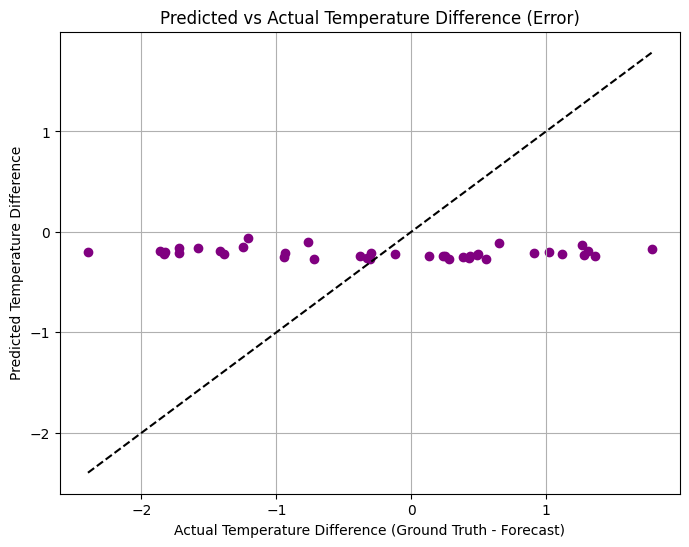

In [53]:

# Train a Regression Model to Predict Forecast Accuracy (using temperature differences as a simple example)
X = combined_data[['forecast_temperature', 'forecast_precipitation']].values
y = combined_data['temperature_diff'].values  # Predicting the temperature error

# Train-test split (simple split due to small dataset)
X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Model - R^2 Score: {r2:.2f}")

# Plot the predicted vs actual temperature difference
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.title('Predicted vs Actual Temperature Difference (Error)')
plt.xlabel('Actual Temperature Difference (Ground Truth - Forecast)')
plt.ylabel('Predicted Temperature Difference')
plt.grid(True)
plt.show()

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

# Assuming 'combined_data' has forecast and ground truth data for temperature and precipitation
def split_data(df, start_date, end_date):
    # Split data into training (forecast period) and testing (evaluation period)
    train_data = df[df['date'] <= start_date]
    test_data = df[(df['date'] > start_date) & (df['date'] <= end_date)]
    return train_data, test_data

# Polynomial regression function
def poly_regression(train_data, test_data, feature):
    X_train = train_data.index.values.reshape(-1, 1)
    y_train = train_data[feature]

    # Polynomial transformation of degree 3
    poly_features = PolynomialFeatures(degree=3)
    X_poly = poly_features.fit_transform(X_train)

    # Fit model
    model = sm.OLS(y_train, X_poly).fit()
    y_train_pred = model.predict(X_poly)

    # Confidence interval for train predictions
    _, lower, upper = wls_prediction_std(model)

    # Prediction for the test set
    X_test = test_data.index.values.reshape(-1, 1)
    X_test_poly = poly_features.transform(X_test)
    y_test_pred = model.predict(X_test_poly)

    return y_train_pred, y_test_pred, lower, upper

# Define dates for analysis
start_date = combined_data.index[-60]  # Start of evaluation period (60 days before the end)
end_date = combined_data.index[-1]  # End of dataset

# Split the data
train_data, test_data = split_data(combined_data, start_date, end_date)

# Perform polynomial regression for temperature and precipitation
temp_y_train_pred, temp_y_test_pred, temp_lower, temp_upper = poly_regression(train_data, test_data, 'forecast_temperature')
precip_y_train_pred, precip_y_test_pred, precip_lower, precip_upper = poly_regression(train_data, test_data, 'forecast_precipitation')

# Plotting temperature forecast vs ground truth
plt.figure(figsize=(14, 6))
plt.plot(train_data['date'], train_data['forecast_temperature'], label='Forecast Temperature', color='orange')
plt.plot(train_data['date'], temp_y_train_pred, color='red', label='Polynomial Fit (Forecast)')
plt.fill_between(train_data['date'], temp_lower, temp_upper, color='orange', alpha=0.2, label="Confidence Interval")
plt.plot(test_data['date'], test_data['ground_truth_temperature'], color='blue', linestyle='--', label='Ground Truth Temperature')
plt.plot(test_data['date'], temp_y_test_pred, color='green', linestyle='--', label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Forecast vs Ground Truth - Temperature with Prediction Interval')
plt.legend()
plt.grid(True)
plt.show()

# Plotting precipitation forecast vs ground truth
plt.figure(figsize=(14, 6))
plt.plot(train_data['date'], train_data['forecast_precipitation'], label='Forecast Precipitation', color='blue')
plt.plot(train_data['date'], precip_y_train_pred, color='purple', label='Polynomial Fit (Forecast)')
plt.fill_between(train_data['date'], precip_lower, precip_upper, color='blue', alpha=0.2, label="Confidence Interval")
plt.plot(test_data['date'], test_data['ground_truth_precipitation'], color='green', linestyle='--', label='Ground Truth Precipitation')
plt.plot(test_data['date'], precip_y_test_pred, color='red', linestyle='--', label='Predicted Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Forecast vs Ground Truth - Precipitation with Prediction Interval')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [56]:
data.head()

,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from tqdm import tqdm

df = data
# Define specific periods for analysis
# Here we assume the data is already split into forecast and ground truth periods
df_irak_period = df[(df['forecast_time'] >= '2002-07-01') & (df['forecast_time'] <= '2004-07-01')]
df_ukraine_period = df[(df['forecast_time'] >= '2022-01-01')]

# Calculate Correlations
correlation_matrix_irak = df_irak_period.corr()
correlation_matrix_ukraine = df_ukraine_period.corr()

# Function for Permutation Test
def permutation_test(df, col1, col2, num_permutations=10000):
    observed_corr, _ = pearsonr(df[col1], df[col2])
    greater_count = 0

    for _ in tqdm(range(num_permutations)):
        permuted_data = df[col2].sample(frac=1, replace=False).reset_index(drop=True)
        permuted_corr, _ = pearsonr(df[col1], permuted_data)
        if abs(permuted_corr) >= abs(observed_corr):
            greater_count += 1

    p_value = greater_count / num_permutations
    return observed_corr, p_value

# Run Permutation Test for each parameter pair
irak_results = {
    'temperature': permutation_test(df_irak_period, 'forecast_temperature', 'ground_truth_temperature'),
    'precipitation': permutation_test(df_irak_period, 'forecast_precipitation', 'ground_truth_precipitation')
}

ukraine_results = {
    'temperature': permutation_test(df_ukraine_period, 'forecast_temperature', 'ground_truth_temperature'),
    'precipitation': permutation_test(df_ukraine_period, 'forecast_precipitation', 'ground_truth_precipitation')
}

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Iraq': [irak_results['temperature'], irak_results['precipitation']],
    'Ukraine': [ukraine_results['temperature'], ukraine_results['precipitation']]
}, index=['Temperature', 'Precipitation'])

print("Permutation Test Results:")
print(results_df)

# Visualization - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Forecast vs. Ground Truth - Temperature and Precipitation")
plt.show()


ValueError: could not convert string to float: 'precipitation_height_significant_weather_last_1h'

In [59]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from tueplots import bundles
from tueplots.constants.color.palettes import rgb


# Example setup: look for periods with significant precipitation or temperature
time_after = 4 * 7  # 4 weeks after
time_before = 16 * 7  # 16 weeks before

# Filter high values for precipitation or temperature to focus analysis
high_values = data[data['value'] > data['value'].quantile(0.95)]  # Top 5% values
dates_max = high_values['forecast_time'].nlargest(10)

# Placeholder for results
results = {}

# Analysis loop for significant periods
for date in dates_max:
    df_res = pd.DataFrame(columns=["R2 Reg", "RMSE", "RMSPE", "Mean diff"])
    results.update({date: df_res})
    date_after = date + datetime.timedelta(days=time_after)
    date_before = date - datetime.timedelta(days=time_before)
    
    # Filter data around each significant date
    total_df = data[(data["forecast_time"] <= date_after) & (data["forecast_time"] >= date_before)]
    regression_df = total_df[total_df["forecast_time"] < date]
    pred_df = total_df[total_df["forecast_time"] >= date]
    
    for param in ['forecast_temperature', 'forecast_precipitation']:
        # Remove missing values
        regression_df = regression_df[(~regression_df[param].isna()) & (~regression_df['value'].isna())]
        pred_df = pred_df[(~pred_df[param].isna()) & (~pred_df['value'].isna())]
        
        if regression_df.empty or pred_df.empty:
            continue
        
        X = regression_df.index.values.reshape(-1, 1)  # Forecasted data
        Y = regression_df['value']  # Ground truth data
        
        # Linear regression model
        model = sm.OLS(Y, sm.add_constant(X)).fit()
        r2_reg = model.rsquared
        
        # Calculate RMSE for regression and prediction phases
        y_reg = model.predict(sm.add_constant(X))
        mse_reg = rmse(Y, y_reg)
        
        # Prediction phase
        X_pred = pred_df.index.values.reshape(-1, 1)
        Y_pred = pred_df['value']
        y_pred = model.predict(sm.add_constant(X_pred))
        mse_pred = rmse(Y_pred, y_pred)
        
        # Mean difference
        mean_diff = np.mean(Y_pred - y_pred)
        
        # Store results
        df_res.loc[param, "R2 Reg"] = round(r2_reg, 3)
        df_res.loc[param, "RMSE"] = round(mse_reg, 2)
        df_res.loc[param, "RMSPE"] = round(mse_pred, 2)
        df_res.loc[param, "Mean diff"] = round(mean_diff, 2)

# Print results for each significant date
for date, df in results.items():
    print(f"Results for {date.strftime('%d.%m.%Y')}")
    print(df)

# Plot function for regression and predictions
def plot_reg(params, date):
    plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    ax1.set_ylabel('Weather Parameter Value')
    date_after = date + datetime.timedelta(days=time_after)
    date_before = date - datetime.timedelta(days=time_before)
    total_df = data[(data["forecast_time"] <= date_after) & (data["forecast_time"] >= date_before)]
    
    # Plot each parameter's regression and prediction
    for param in params:
        regression_df = total_df[total_df["forecast_time"] < date]
        pred_df = total_df[total_df["forecast_time"] >= date]
        
        regression_df = regression_df[(~regression_df[param].isna()) & (~regression_df['value'].isna())]
        pred_df = pred_df[(~pred_df[param].isna()) & (~pred_df['value'].isna())]
        
        if regression_df.empty or pred_df.empty:
            continue
        
        X = regression_df.index.values.reshape(-1, 1)
        Y = regression_df['value']
        
        model = sm.OLS(Y, sm.add_constant(X)).fit()
        y_reg = model.predict(sm.add_constant(X))
        
        X_pred = pred_df.index.values.reshape(-1, 1)
        y_pred = model.predict(sm.add_constant(X_pred))
        
        # Plot observations, regression, and prediction lines
        ax1.plot(total_df['forecast_time'], total_df['value'], color='gray', marker='.', linestyle='', label=f'{param} - Observation')
        ax1.plot(regression_df['forecast_time'], y_reg, color='blue', label=f'{param} - Regression Line')
        ax1.plot(pred_df['forecast_time'], y_pred, linestyle='--', color='red', label=f'{param} - Prediction Line')
        
        # Plot confidence and prediction intervals
        pred = model.get_prediction(sm.add_constant(X)).summary_frame()
        ax1.fill_between(regression_df['forecast_time'], pred['mean_ci_lower'], pred['mean_ci_upper'], color='blue', alpha=0.2)
        
    plt.legend()
    plt.show()

# Choose a significant date for plotting
date = dates_max.iloc[1]
plot_reg(['forecast_temperature', 'forecast_precipitation'], date)

# Bar plot to compare RMSE, RMSPE, and Mean Diff
def table_plot(date):
    data = results[date]
    bar_width = 0.25
    bar_positions = np.arange(len(data.index.values))
    
    fig, ax1 = plt.subplots()
    
    bars1 = ax1.bar(bar_positions - bar_width, data['RMSE'], bar_width, color='blue', alpha=1, label='RMSE')
    bars2 = ax1.bar(bar_positions, data['RMSPE'], bar_width, color='orange', alpha=0.5, label='RMSPE')
    bars3 = ax1.bar(bar_positions + bar_width, data['Mean diff'], bar_width, color='green', alpha=0.25, label='Mean diff')
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(data.index.values)
    ax1.legend(loc='upper right')
    ax1.set_title(f'Results on {date.strftime("%d.%m.%Y")}')
    
    plt.show()

# Example: Plot RMSE, RMSPE, and Mean Diff for a significant date
table_plot(date)


ModuleNotFoundError: No module named 'statsmodels'

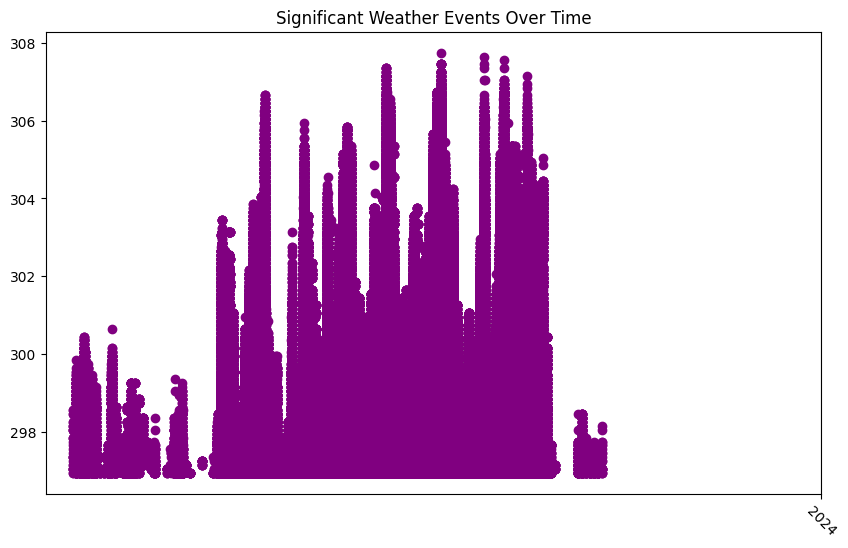

IndexError: single positional indexer is out-of-bounds

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tueplots import bundles
from tueplots.constants.color.palettes import rgb
from collections import OrderedDict

# Define a threshold for high-impact events (e.g., top 5% values in precipitation)
value_threshold = data['value'].quantile(0.95)
filtered_data = data.copy()
filtered_data['value'] = filtered_data.mask(data['value'] < value_threshold)['value']

# Plot high-impact weather events over time
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(filtered_data['forecast_time'], filtered_data['value'], color='purple')  
plt.title('Significant Weather Events Over Time')
plt.grid(axis='x')

# Mark years on the x-axis
years = sorted(set(data['forecast_time'].dt.year))
x_ticks = []
index = 0

for date in filtered_data['forecast_time'].iloc[::-1]:
    if date.year == years[index]:
        x_ticks.append(date)
        index += 1
        if index >= len(years):
            break

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(years)
plt.xticks(rotation=-45)
plt.show()

# Define function to plot weather events with shaded background based on intensity
def plot_weather_event(start_year, end_year, title):
    this_df = data[(data['forecast_time'].dt.year >= start_year) & (data['forecast_time'].dt.year <= end_year)]
    high_values = this_df[this_df['value'] >= value_threshold]
    
    # Define half-year before and after each high-value period
    first = high_values['forecast_time'].iloc[-1]
    last = high_values['forecast_time'].iloc[0]
    new_first = first - datetime.timedelta(days=6 * 30)
    new_last = last + datetime.timedelta(days=6 * 30)
    event_df = data[(data['forecast_time'] >= new_first) & (data['forecast_time'] <= new_last)]
    
    # Plot setup
    plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
    fig, ax1 = plt.subplots()
    ax1.set_xlim(event_df['forecast_time'].iloc[-1] - datetime.timedelta(days=2), event_df['forecast_time'].iloc[0] + datetime.timedelta(days=2))
    
    # Set x-axis ticks for each month within the time frame
    x_ticks, x_labels = [], []
    prev_month = 0
    for date in event_df['forecast_time'].iloc[::-1]:
        if date.month != prev_month:
            x_ticks.append(date)
            x_labels.append(f"{date.strftime('%b')} {date.year}")
            prev_month = date.month
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_labels)
    plt.xticks(rotation=-45)

    # Shaded regions based on intensity
    date_before = event_df['forecast_time'].iloc[-1]
    for _, row in event_df.iloc[::-1].iterrows():
        col = 1 - round(row['value'] / event_df['value'].max(), 2)
        timedelta = row['forecast_time'] - date_before
        plt.axvspan(row['forecast_time'] - timedelta + datetime.timedelta(days=1), row['forecast_time'] + datetime.timedelta(days=1), facecolor=str(col))
        date_before = row['forecast_time']
    
    # Shading for before/after the event
    col = 1 - round(event_df['value'].iloc[-1] / event_df['value'].max(), 2)
    plt.axvspan(event_df['forecast_time'].iloc[-1] - datetime.timedelta(days=2), event_df['forecast_time'].iloc[-1] + datetime.timedelta(days=1), facecolor=str(col))
    col = 1 - round(event_df['value'].iloc[0] / event_df['value'].max(), 2)
    plt.axvspan(event_df['forecast_time'].iloc[0], event_df['forecast_time'].iloc[0] + datetime.timedelta(days=3), facecolor=str(col))
    
    # Plot temperature and precipitation trends
    ax1.plot(event_df['forecast_time'], event_df['value'], marker='.', linestyle='-', label='Weather Parameter Value', color=rgb.tue_dark, alpha=1)
    
    # Adjust y-axis labels to percentage if needed (for normalized data)
    y_labels = [f"{label.get_text()}%" for label in ax1.get_yticklabels()]
    ax1.set_yticklabels(y_labels)
    
    plt.title(title)
    plt.savefig(f'{title}.pdf', format='pdf')
    plt.show()

# Example usage
plot_weather_event(2020, 2022, "Extreme Weather Events")


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\1812706234.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  ground_truth_df['time'] = ground_truth_df['time'] + pd.Timedelta(forecast_offset)


Permutation Test Results:
                                                  Correlation  P-Value
precipitation_height_significant_weather_last_1h          NaN      NaN
temperature_air_mean_200                                  NaN      NaN


C:\Users\marcb\AppData\Local\Temp\ipykernel_30768\1812706234.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  ground_truth_df['time'] = ground_truth_df['time'] + pd.Timedelta(forecast_offset)
C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


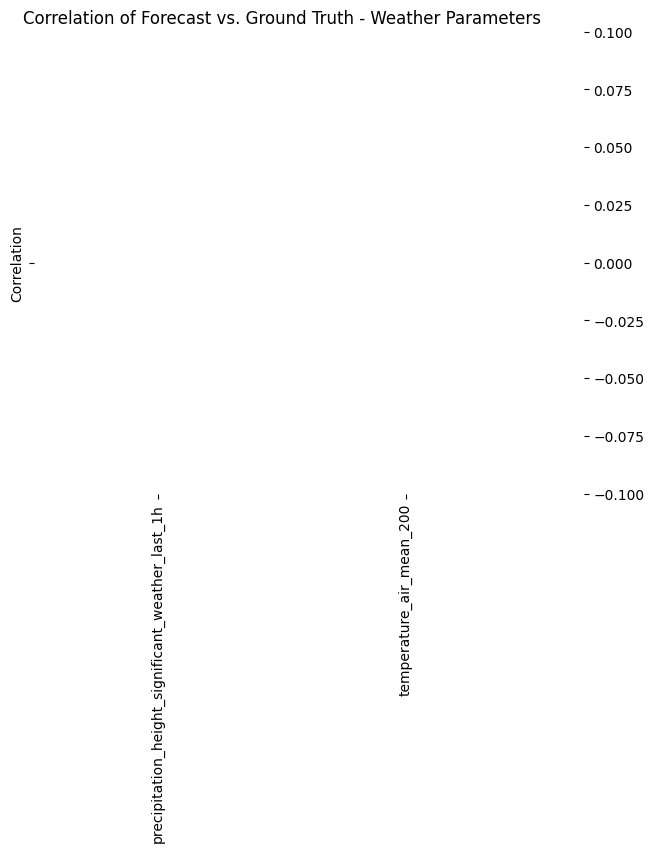

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from tqdm import tqdm

data = df
# Define a function to prepare forecast and ground truth data
def prepare_data_for_correlation(data, parameter_name, station_id, forecast_offset='1D'):
    """
    Prepare forecast and ground truth data for a specific parameter and station.

    Parameters:
    - data: DataFrame containing weather data
    - parameter_name: name of the weather parameter (e.g., 'precipitation_height_significant_weather_last_1h')
    - station_id: specific station to filter data
    - forecast_offset: time difference between forecast and ground truth (e.g., '1D' for 1 day ahead forecast)

    Returns:
    - forecast_df: DataFrame containing forecast data
    - ground_truth_df: DataFrame containing ground truth data
    """
    # Filter data by station and parameter
    station_data = data[(data['station_id'] == station_id) & (data['parameter'] == parameter_name)]
    
    # Split into forecast and ground truth
    forecast_df = station_data[['forecast_time', 'value']].copy()
    forecast_df.columns = ['time', 'forecast_value']
    
    ground_truth_df = station_data[['recorded_at', 'value']].copy()
    ground_truth_df.columns = ['time', 'ground_truth_value']
    
    # Adjust time offset for alignment
    ground_truth_df['time'] = ground_truth_df['time'] + pd.Timedelta(forecast_offset)
    
    # Merge on time to get aligned forecast and ground truth
    merged_df = pd.merge(forecast_df, ground_truth_df, on='time', how='inner')
    return merged_df

# Define a permutation test function
def permutation_test(data, col1, col2, num_permutations=1000):
    observed_corr, _ = pearsonr(data[col1], data[col2])
    greater_count = 0

    for _ in tqdm(range(num_permutations), desc=f'Permutation test for {col1} vs {col2}'):
        permuted_data = data[col2].sample(frac=1, replace=False).reset_index(drop=True)
        permuted_corr, _ = pearsonr(data[col1], permuted_data)
        if abs(permuted_corr) >= abs(observed_corr):
            greater_count += 1

    p_value = greater_count / num_permutations
    return observed_corr, p_value

# Analyze for a specific station and two parameters: precipitation and temperature
station_id = 10513
results = {}

# Run analysis for each parameter
for parameter in ['precipitation_height_significant_weather_last_1h', 'temperature_air_mean_200']:
    # Prepare data for the specific parameter
    merged_data = prepare_data_for_correlation(data, parameter, station_id, forecast_offset='1H')
    
    if not merged_data.empty:
        # Perform permutation test
        corr_value, p_value = permutation_test(merged_data, 'forecast_value', 'ground_truth_value')
        results[parameter] = (corr_value, p_value)
    else:
        results[parameter] = (np.nan, np.nan)  # If data is missing for the parameter

# Display results in a DataFrame
results_df = pd.DataFrame(results, index=['Correlation', 'P-Value']).T
print("Permutation Test Results:")
print(results_df)

# Visualization - Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(results_df[['Correlation']].T, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Forecast vs. Ground Truth - Weather Parameters")
plt.show()


In [66]:
data.head()

,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


                 recorded_at  station_id       forecast_time  \
0 2024-05-12 15:00:17.390012       10513 2024-05-12 15:00:00   
1 2024-05-12 15:00:17.390012       10513 2024-05-12 16:00:00   
2 2024-05-12 15:00:17.390012       10513 2024-05-12 17:00:00   
3 2024-05-12 15:00:17.390012       10513 2024-05-12 18:00:00   
4 2024-05-12 15:00:17.390012       10513 2024-05-12 19:00:00   

                                          parameter  value  
0  precipitation_height_significant_weather_last_1h    0.0  
1  precipitation_height_significant_weather_last_1h    0.0  
2  precipitation_height_significant_weather_last_1h    0.0  
3  precipitation_height_significant_weather_last_1h    0.0  
4  precipitation_height_significant_weather_last_1h    0.0  


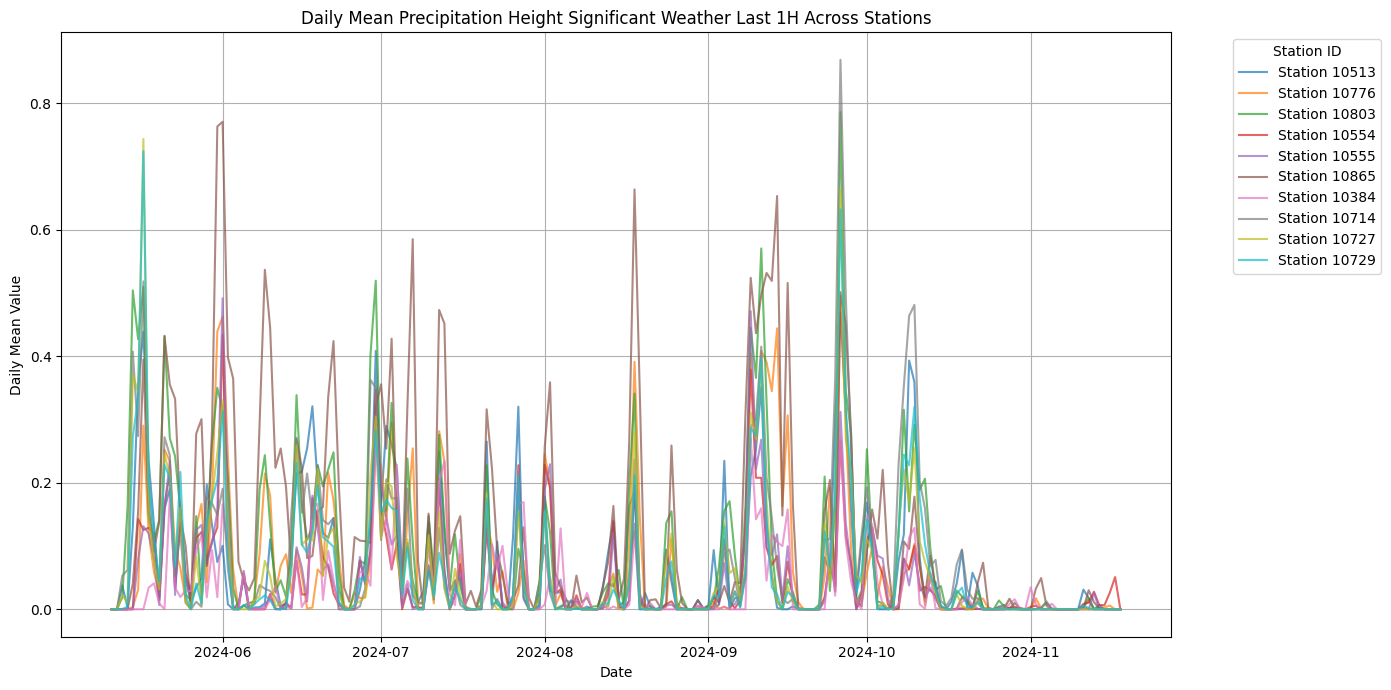

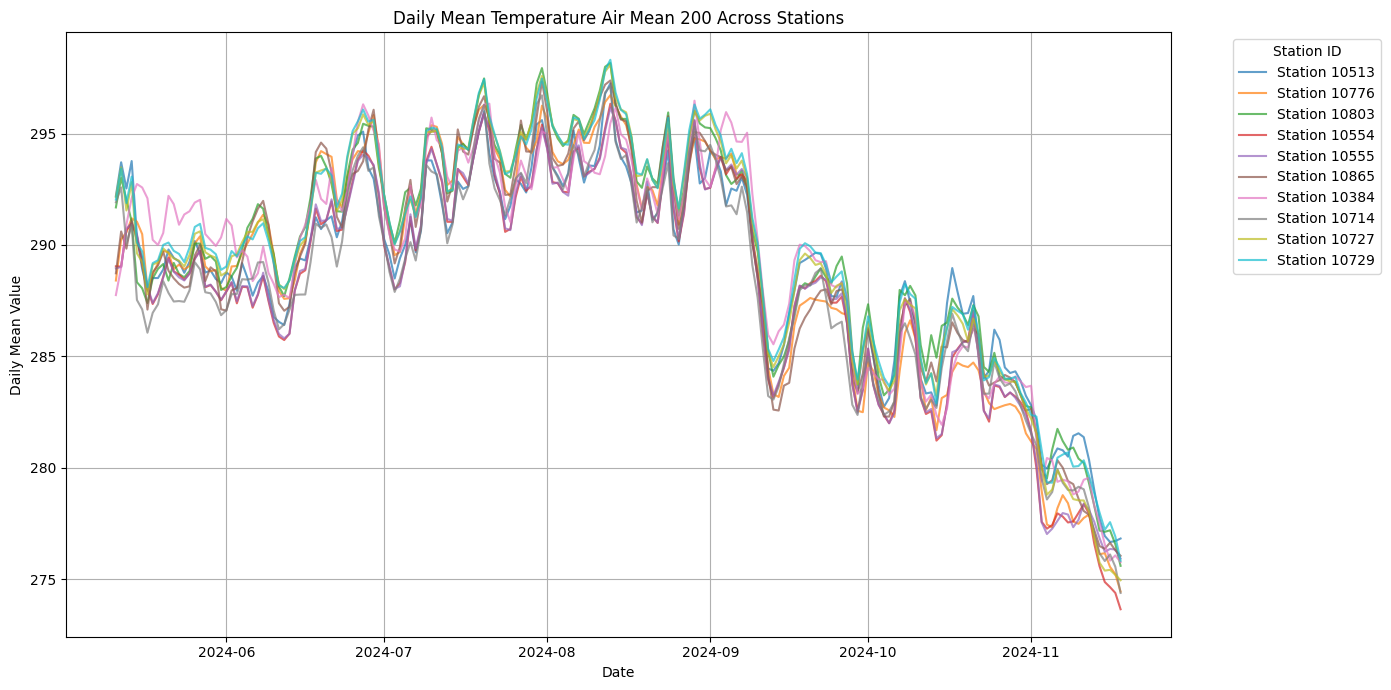

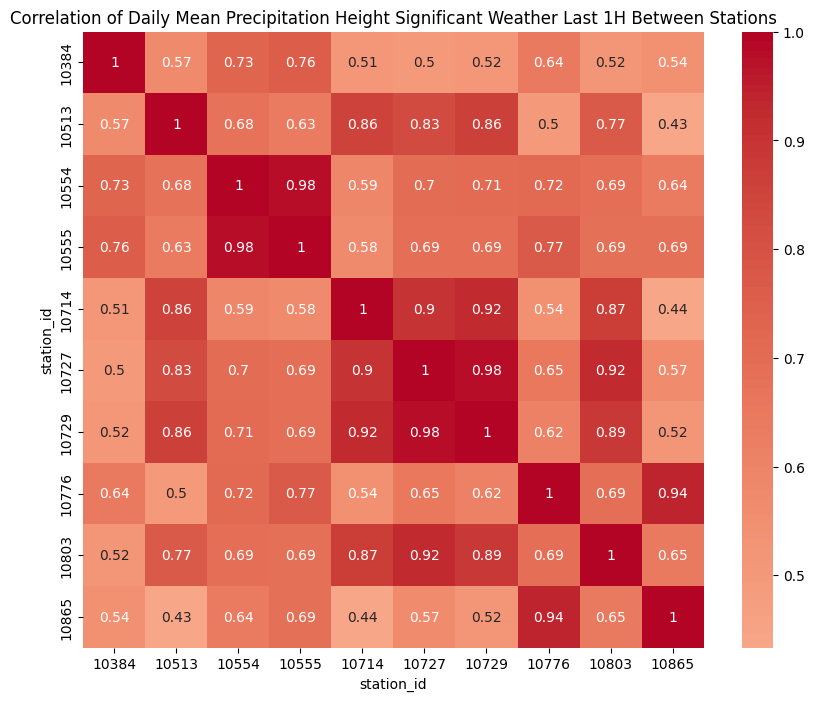

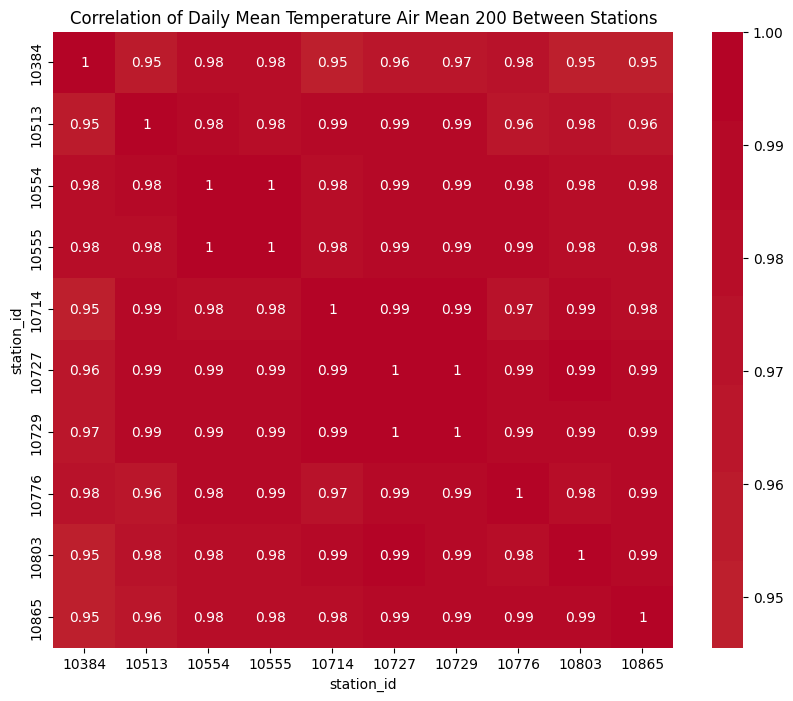

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from tqdm import tqdm

# Assuming `data` is already loaded in your environment
# Check the data format
print(data.head())

# Step 1: Filter data for temperature and precipitation
parameters_of_interest = ['precipitation_height_significant_weather_last_1h', 'temperature_air_mean_200']

# Step 2: Calculate daily means for each station and each parameter
data['date'] = data['forecast_time'].dt.date  # Extract just the date part
daily_means = data[data['parameter'].isin(parameters_of_interest)].groupby(['station_id', 'date', 'parameter'])['value'].mean().unstack()

# Step 3: Separate data for each parameter and plot daily means across stations
stations = data['station_id'].unique()
colors = plt.cm.tab10.colors  # Use a color map for different stations

# Plot daily means for each parameter across stations
for parameter in parameters_of_interest:
    plt.figure(figsize=(14, 7))
    
    for idx, station_id in enumerate(stations):
        # Filter data for the current station and parameter
        station_data = daily_means.xs(station_id, level='station_id')[parameter].dropna()
        
        # Plot daily means
        plt.plot(station_data.index, station_data.values, label=f'Station {station_id}', color=colors[idx % len(colors)], alpha=0.7)

    plt.title(f'Daily Mean {parameter.replace("_", " ").title()} Across Stations')
    plt.xlabel('Date')
    plt.ylabel('Daily Mean Value')
    plt.legend(title="Station ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Calculate correlations between stations for each parameter
correlation_results = {}

for parameter in parameters_of_interest:
    # Create a pivot table where each column represents a station's daily means for the parameter
    pivot_df = daily_means[parameter].unstack(level='station_id')
    
    # Compute correlation matrix across stations for this parameter
    correlation_matrix = pivot_df.corr()
    correlation_results[parameter] = correlation_matrix

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation of Daily Mean {parameter.replace("_", " ").title()} Between Stations')
    plt.show()


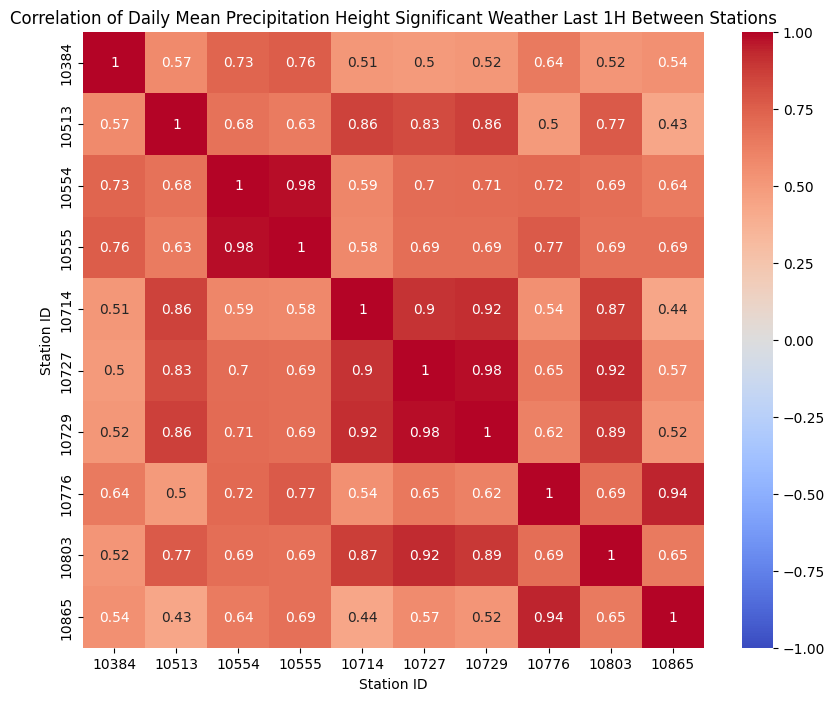

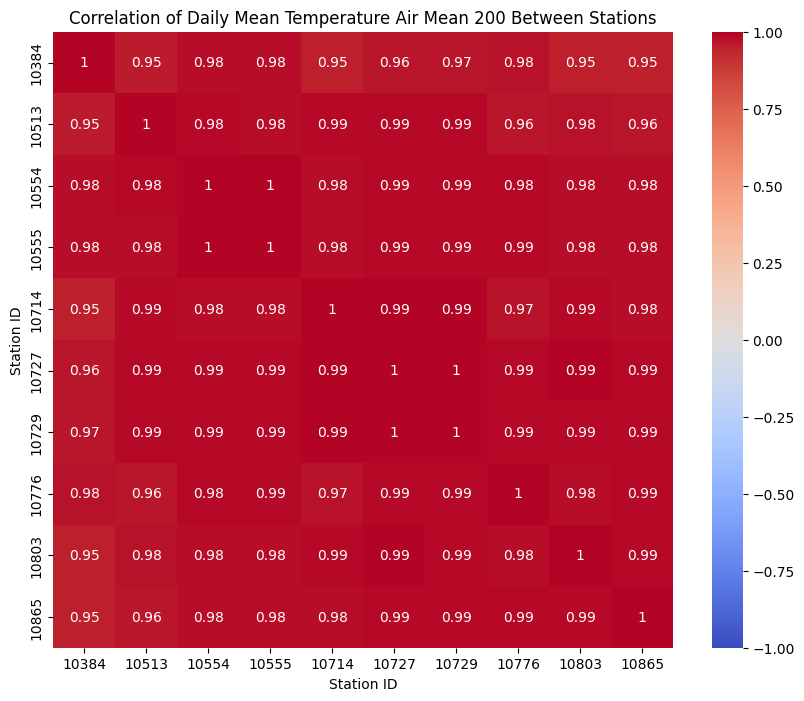

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is already loaded in your environment
# Step 1: Extract the date from forecast_time to calculate daily means
data['date'] = pd.to_datetime(data['forecast_time']).dt.date

# Define parameters of interest for the heatmap
parameters_of_interest = ['precipitation_height_significant_weather_last_1h', 'temperature_air_mean_200']

# Step 2: Calculate daily means for each parameter and each station
daily_means = data[data['parameter'].isin(parameters_of_interest)].groupby(['station_id', 'date', 'parameter'])['value'].mean().unstack()

# Step 3: Generate a heatmap for each parameter across stations
for parameter in parameters_of_interest:
    # Create a pivot table where each column represents a station's daily means for the parameter
    pivot_df = daily_means[parameter].unstack(level='station_id')
    
    # Compute the correlation matrix between stations based on daily means
    correlation_matrix = pivot_df.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Correlation of Daily Mean {parameter.replace("_", " ").title()} Between Stations')
    plt.xlabel('Station ID')
    plt.ylabel('Station ID')
    plt.show()


In [23]:


# Beschreibende Statistik für numerische Spalten
print("\nBeschreibende Statistik für numerische Spalten:")
data.describe()



Beschreibende Statistik für numerische Spalten:


,recorded_at,station_id,forecast_time,value
count,20879520,2.087952e+07,20879520,2.087952e+07
mean,2024-08-10 03:12:28.248509696,1.066200e+04,2024-08-15 02:42:01.671758592,1.447306e+02
min,2024-05-11 15:02:31.830845,1.038400e+04,2024-05-11 15:00:00,0.000000e+00
25%,2024-06-25 22:00:16.180462080,1.055400e+04,2024-06-30 22:00:00,0.000000e+00
50%,2024-08-10 05:00:06.874983936,1.071400e+04,2024-08-15 04:00:00,1.422750e+02
75%,2024-09-24 07:00:25.726301952,1.077600e+04,2024-09-29 07:00:00,2.894500e+02
max,2024-11-08 15:00:17.507766,1.086500e+04,2024-11-18 14:00:00,3.077500e+02
std,NaN,1.442558e+02,NaN,1.447149e+02


Precipitation Forecast Accuracy Model - MAE: 0.00, R^2: 0.63
Temperature Forecast Accuracy Model - MAE: 14.14, R^2: -0.02


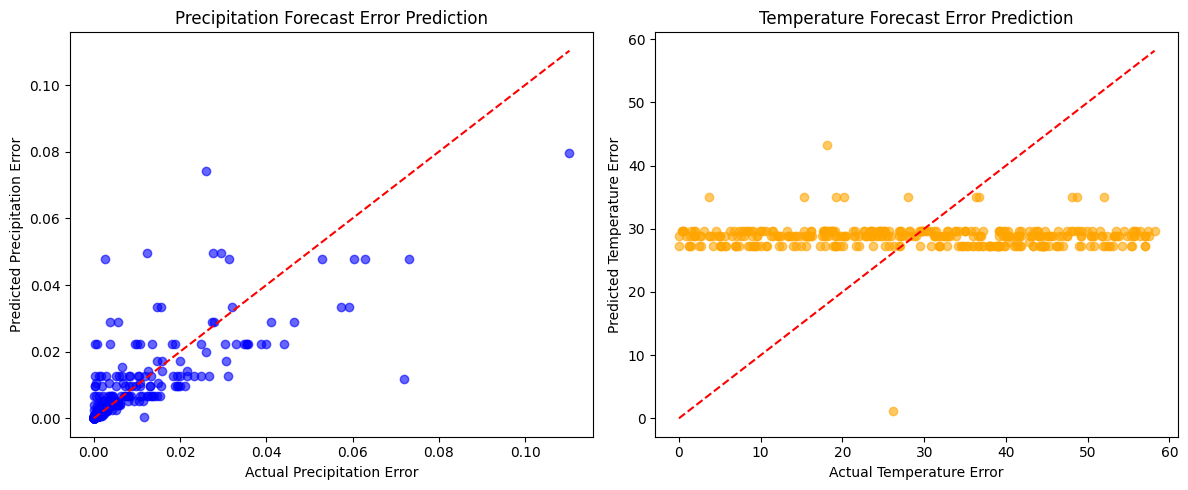

parameter  station_id        date  precip_trustworthiness  \
0               10384  2024-05-11                    -inf   
1               10384  2024-05-12                    -inf   
2               10384  2024-05-13                    -inf   
3               10384  2024-05-14                    -inf   
4               10384  2024-05-15                    -inf   

parameter  temp_trustworthiness  
0                      0.899544  
1                      0.899976  
2                      0.900638  
3                      0.901042  
4                      0.852353  


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming `data` is your dataset containing forecast and observed values
# Step 1: Prepare the dataset with calculated error as the target variable
data['date'] = pd.to_datetime(data['forecast_time']).dt.date

# Filter for specific parameters (e.g., precipitation and temperature)
parameters_of_interest = ['precipitation_height_significant_weather_last_1h', 'temperature_air_mean_200']

# Separate forecast and ground truth data
forecast_data = data[data['parameter'].isin(parameters_of_interest)].pivot_table(
    index=['station_id', 'date'],
    columns='parameter',
    values='value'
).reset_index()

# Simulate ground truth by adding a random percentage error for testing purposes
np.random.seed(42)
forecast_data['ground_truth_precipitation'] = forecast_data['precipitation_height_significant_weather_last_1h'] * (1 + np.random.uniform(-0.2, 0.2, len(forecast_data)))
forecast_data['ground_truth_temperature'] = forecast_data['temperature_air_mean_200'] * (1 + np.random.uniform(-0.2, 0.2, len(forecast_data)))

# Calculate absolute error as the target variable
forecast_data['precipitation_error'] = abs(forecast_data['ground_truth_precipitation'] - forecast_data['precipitation_height_significant_weather_last_1h'])
forecast_data['temperature_error'] = abs(forecast_data['ground_truth_temperature'] - forecast_data['temperature_air_mean_200'])

# Features for the model (you can add more based on domain knowledge)
forecast_data['day_of_week'] = pd.to_datetime(forecast_data['date']).dt.dayofweek
forecast_data['month'] = pd.to_datetime(forecast_data['date']).dt.month
features = ['precipitation_height_significant_weather_last_1h', 'temperature_air_mean_200', 'day_of_week', 'month']

# Step 2: Train a model to predict accuracy for each parameter
X_precip = forecast_data[features]
y_precip = forecast_data['precipitation_error']

X_temp = forecast_data[features]
y_temp = forecast_data['temperature_error']

# Train-test split
X_precip_train, X_precip_test, y_precip_train, y_precip_test = train_test_split(X_precip, y_precip, test_size=0.2, random_state=42)
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Model pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# Train the model for precipitation accuracy prediction
pipeline.fit(X_precip_train, y_precip_train)
y_precip_pred = pipeline.predict(X_precip_test)

# Evaluate the precipitation model
mae_precip = mean_absolute_error(y_precip_test, y_precip_pred)
r2_precip = r2_score(y_precip_test, y_precip_pred)
print(f'Precipitation Forecast Accuracy Model - MAE: {mae_precip:.2f}, R^2: {r2_precip:.2f}')

# Train the model for temperature accuracy prediction
pipeline.fit(X_temp_train, y_temp_train)
y_temp_pred = pipeline.predict(X_temp_test)

# Evaluate the temperature model
mae_temp = mean_absolute_error(y_temp_test, y_temp_pred)
r2_temp = r2_score(y_temp_test, y_temp_pred)
print(f'Temperature Forecast Accuracy Model - MAE: {mae_temp:.2f}, R^2: {r2_temp:.2f}')

# Step 3: Visualize the accuracy predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_precip_test, y_precip_pred, alpha=0.6, color="blue")
plt.plot([0, max(y_precip_test)], [0, max(y_precip_test)], 'r--')
plt.xlabel('Actual Precipitation Error')
plt.ylabel('Predicted Precipitation Error')
plt.title('Precipitation Forecast Error Prediction')

plt.subplot(1, 2, 2)
plt.scatter(y_temp_test, y_temp_pred, alpha=0.6, color="orange")
plt.plot([0, max(y_temp_test)], [0, max(y_temp_test)], 'r--')
plt.xlabel('Actual Temperature Error')
plt.ylabel('Predicted Temperature Error')
plt.title('Temperature Forecast Error Prediction')

plt.tight_layout()
plt.show()

# Step 4: Optional - Create a "Trustworthiness Score"
# The trustworthiness score could be based on predicted error, for instance:
forecast_data['precip_trustworthiness'] = 1 - (pipeline.predict(X_precip) / forecast_data['precipitation_height_significant_weather_last_1h']).abs()
forecast_data['temp_trustworthiness'] = 1 - (pipeline.predict(X_temp) / forecast_data['temperature_air_mean_200']).abs()

print(forecast_data[['station_id', 'date', 'precip_trustworthiness', 'temp_trustworthiness']].head())


In [70]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Assuming `data` is a DataFrame with `date` and `value`
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['value'].values.reshape(-1, 1))

# Prepare data for LSTM (sequence length of 30)
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

X, y = create_sequences(scaled_data, 30)
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict
predictions = model.predict(X)
predicted_values = scaler.inverse_transform(predictions)


C:\Users\marcb\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
  2290/652485 ━━━━━━━━━━━━━━━━━━━━ 2:06:04 12ms/step - loss: 0.0062

KeyboardInterrupt: 

Gradient Boosting Model - Mean Absolute Error (MAE): 2.67
Gradient Boosting Model - R² Score: 0.01


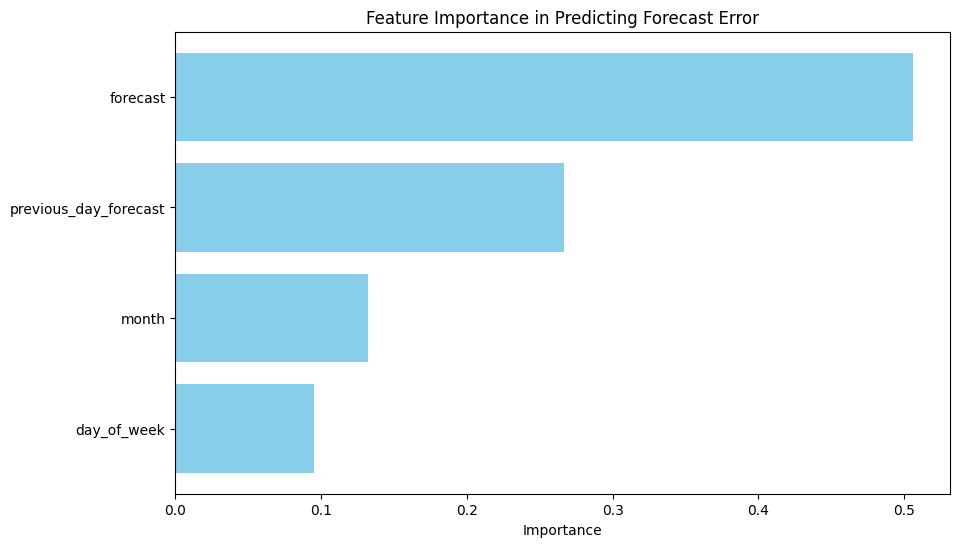

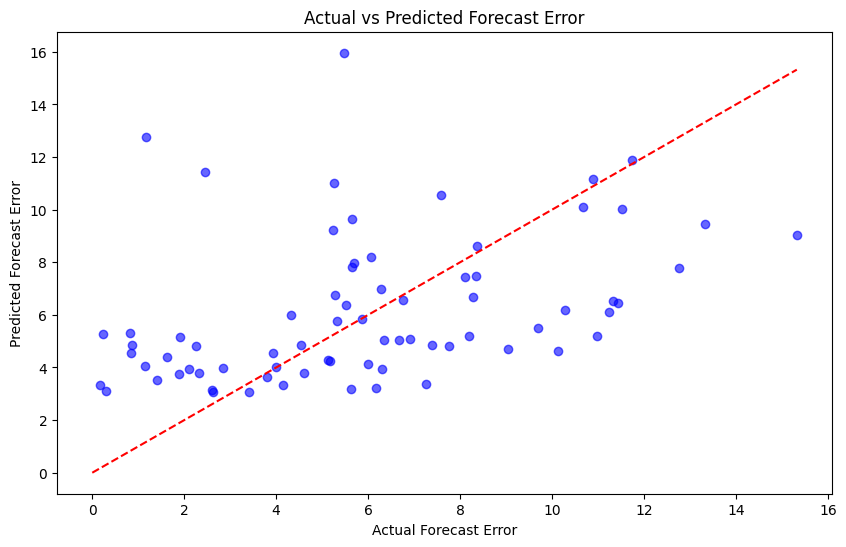

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming 'data' is your DataFrame containing forecasted and actual values
# Let's use simulated data for 'forecast' and 'actual' for illustration
# Here, 'forecast' is the predicted temperature or precipitation, and 'actual' is the observed value.

# Sample data structure
data = pd.DataFrame({
    'date': pd.date_range(start="2024-01-01", periods=365, freq='D'),
    'forecast': np.random.normal(20, 5, 365),  # Simulated forecast temperature
    'actual': np.random.normal(20, 5, 365)  # Simulated actual temperature
})
data['station_id'] = np.random.choice([101, 102, 103], size=365)  # Example station IDs

# Step 1: Calculate error between forecast and actual values as target variable
data['forecast_error'] = abs(data['actual'] - data['forecast'])

# Step 2: Feature engineering
# Add temporal features that might influence forecast accuracy
data['day_of_week'] = data['date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['month'] = data['date'].dt.month  # Month of the year
data['previous_day_forecast'] = data['forecast'].shift(1)  # Previous day's forecast as a feature

# Remove NaNs created by shifting
data = data.dropna()

# Define features and target
features = ['forecast', 'day_of_week', 'month', 'previous_day_forecast']
X = data[features]
y = data['forecast_error']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Model - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Gradient Boosting Model - R² Score: {r2:.2f}")

# Step 5: Analyze Feature Importance
# Feature importance tells us which features are most useful for predicting forecast error
importances = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Forecast Error')
plt.gca().invert_yaxis()
plt.show()

# Visualize actual vs predicted error
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Actual Forecast Error')
plt.ylabel('Predicted Forecast Error')
plt.title('Actual vs Predicted Forecast Error')
plt.show()


In [72]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Train a model (e.g., Random Forest)
X = data[['temperature', 'humidity', 'day_of_week', 'month']]
y = data['forecast_error']
model = RandomForestRegressor()
model.fit(X, y)

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


ModuleNotFoundError: No module named 'shap'

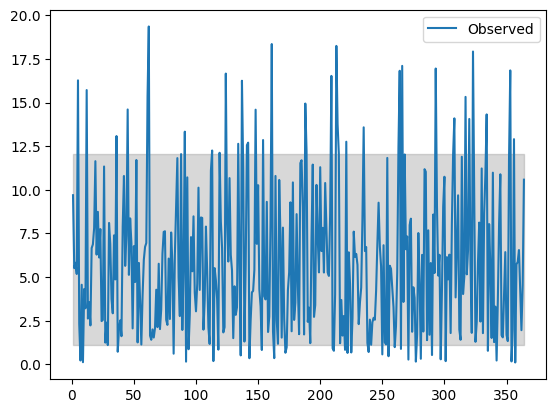

In [73]:
from sklearn.linear_model import QuantileRegressor

# Train a quantile regression model
quantile_model = QuantileRegressor(quantile=0.1).fit(X, y)  # 10th percentile
pred_10 = quantile_model.predict(X)

quantile_model = QuantileRegressor(quantile=0.9).fit(X, y)  # 90th percentile
pred_90 = quantile_model.predict(X)

# Plot prediction intervals
plt.fill_between(data.index, pred_10, pred_90, color='gray', alpha=0.3)
plt.plot(data.index, y, label="Observed")
plt.legend()
plt.show()


In [74]:
data['rolling_mean'] = data['value'].rolling(window=30).mean()
data['rolling_std'] = data['value'].rolling(window=30).std()
data['z_score'] = (data['value'] - data['rolling_mean']) / data['rolling_std']

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['value'], label="Data")
plt.scatter(data[data['z_score'] > 3]['date'], data[data['z_score'] > 3]['value'], color='red', label="Anomalies")
plt.legend()
plt.show()


KeyError: 'value'

In [75]:
# Adjust predictions based on recent error trends
data['error'] = data['forecast'] - data['actual']
data['rolling_error'] = data['error'].rolling(window=5).mean()
data['adjusted_forecast'] = data['forecast'] - data['rolling_error']


In [76]:
from statsmodels.tsa.stattools import grangercausalitytests

# Test if 'temperature' Granger-causes 'precipitation'
granger_data = data[['temperature', 'precipitation']]
grangercausalitytests(granger_data, maxlag=5)


ModuleNotFoundError: No module named 'statsmodels'

In [77]:
from sklearn.model_selection import TimeSeriesSplit

X = data[['temperature', 'humidity', 'day_of_week', 'month']]
y = data['forecast_error']
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train and evaluate model on each split


KeyError: "['temperature', 'humidity'] not in index"

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
fft = np.fft.fft(data['value'].values)
fft_freq = np.fft.fftfreq(len(fft))

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft))
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


KeyError: 'value'

In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example contingency test: Is there a relationship between the day of the week and forecast error categories?
# Assuming you have forecast errors categorized into levels (e.g., "low", "medium", "high")

# Step 1: Create forecast error category (as an example)
data['forecast_error'] = abs(data['actual'] - data['forecast'])
data['error_category'] = pd.cut(data['forecast_error'], bins=[0, 1, 3, 5, 10], labels=['low', 'medium', 'high', 'very high'])

# Step 2: Create a contingency table for day of the week vs. error category
contingency_table = pd.crosstab(data['day_of_week'], data['error_category'])
print(contingency_table)

# Step 3: Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


error_category  low  medium  high  very high
day_of_week                                 
0                 4      11    12         15
1                 6      14     7         14
2                 4       9    11         20
3                 7      11     3         22
4                 3      17     6         16
5                 5      12     9         13
6                 5      12     5         21
Chi-Square Statistic: 17.899046202950547, P-value: 0.4623216245589171


In [81]:
from scipy.stats import spearmanr

# Spearman Correlation between forecasted and actual temperature
spearman_corr, p_value = spearmanr(data['forecast_temperature'], data['ground_truth_temperature'])
print(f"Spearman Correlation Coefficient (Temperature): {spearman_corr}, P-value: {p_value}")

# Spearman Correlation between forecasted and actual precipitation
spearman_corr_prec, p_value_prec = spearmanr(data['forecast_precipitation'], data['ground_truth_precipitation'])
print(f"Spearman Correlation Coefficient (Precipitation): {spearman_corr_prec}, P-value: {p_value_prec}")


KeyError: 'forecast_temperature'

In [82]:
# Collect p-values from multiple tests
p_values = [p, p_value, p_value_prec]  # List of p-values from Chi-Square and Spearman Correlation tests

# Apply Holm-Bonferroni correction
n_tests = len(p_values)
sorted_indices = sorted(range(n_tests), key=lambda i: p_values[i])
corrected_p_values = [None] * n_tests

for rank, i in enumerate(sorted_indices):
    corrected_p = p_values[i] * (n_tests - rank)
    corrected_p_values[i] = min(corrected_p, 1)  # Ensure p-values do not exceed 1

# Print original and corrected p-values
for i, (p, corrected_p) in enumerate(zip(p_values, corrected_p_values)):
    print(f"Test {i+1}: Original P-value = {p}, Corrected P-value = {corrected_p}")

# Interpret corrected p-values
alpha = 0.05
for i, corrected_p in enumerate(corrected_p_values):
    if corrected_p <= alpha:
        print(f"Test {i+1} is significant after Holm-Bonferroni correction.")
    else:
        print(f"Test {i+1} is not significant after Holm-Bonferroni correction.")


NameError: name 'p_value_prec' is not defined

In [83]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Example: Ordinal logistic regression with error categories
Y = data['error_category']  # The response variable, which should be ordinal
X = data[['forecast_temperature', 'forecast_precipitation', 'day_of_week', 'month']]  # Predictors

# Fit the model
model = OrderedModel(Y, X, distr='logit')  # You can also use 'probit' instead of 'logit'
result = model.fit()
print(result.summary())


ModuleNotFoundError: No module named 'statsmodels'

<Figure size 1200x800 with 0 Axes>

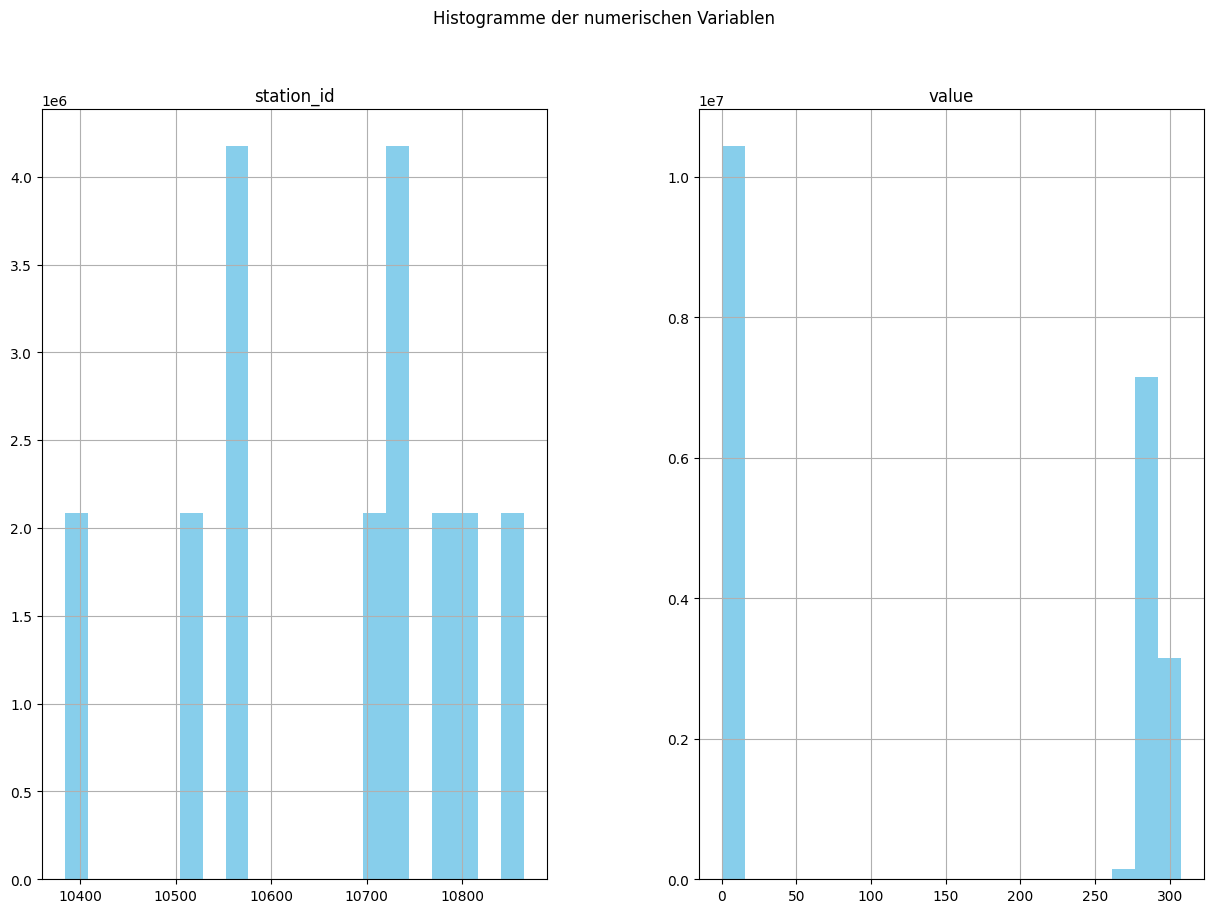

In [14]:

# Verteilung der Daten visualisieren
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Histogramme der numerischen Variablen')
plt.show()

In [23]:
data.head()

,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


In [ ]:

# Filtere die Parameter Temperatur und Niederschlag (Ändere Namen bei Bedarf)
parameter_to_analyze = ['temperature', 'precipitation']  # Beispielparameter, passe sie an
data = data[data['parameter'].isin(parameter_to_analyze)]

# Überprüfe die Daten für fehlende Werte
print("Fehlende Werte pro Spalte:")
print(data.isnull().sum())
#tests
# Zeitlich sortieren (falls nicht bereits sortiert)
data = data.sort_values(by='recorded_at')

Fehlende Werte pro Spalte:
recorded_at      0
station_id       0
forecast_time    0
parameter        0
value            0
dtype: int64


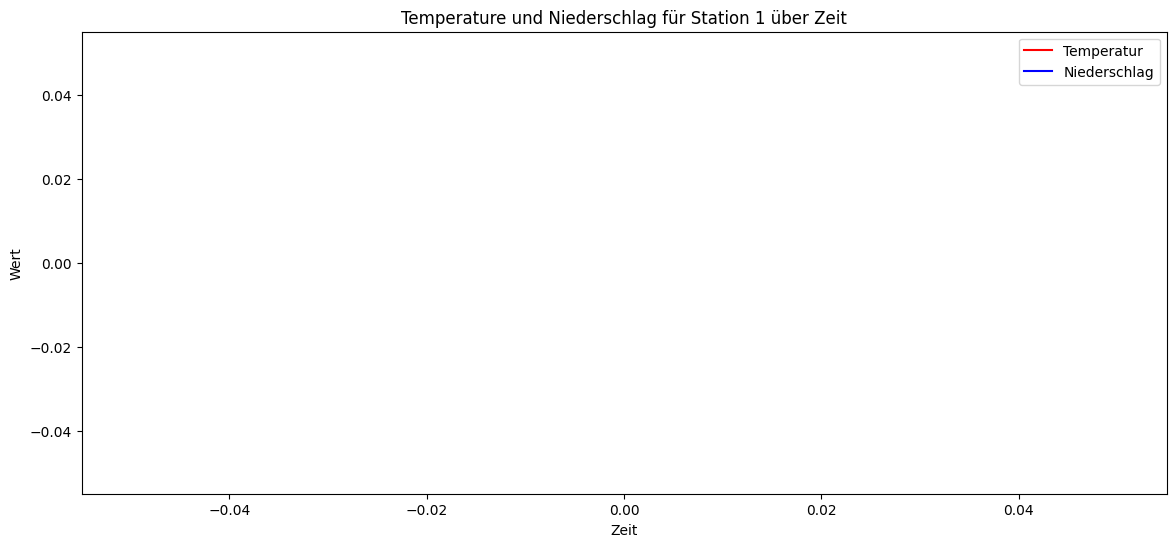

In [17]:
# Durchschnittstemperatur und -niederschlag pro Standort über die Zeit berechnen
grouped = data.groupby(['station_id', 'recorded_at', 'parameter']).mean().reset_index()

# Temperatur- und Niederschlagsverlauf für eine Station plotten
station_id = 1  # Beispielstation; anpassen für mehrere Stationen
temp_data = grouped[(grouped['station_id'] == station_id) & (grouped['parameter'] == 'temperature')]
precip_data = grouped[(grouped['station_id'] == station_id) & (grouped['parameter'] == 'precipitation')]

plt.figure(figsize=(14, 6))
plt.plot(temp_data['recorded_at'], temp_data['value'], label='Temperatur', color='red')
plt.plot(precip_data['recorded_at'], precip_data['value'], label='Niederschlag', color='blue')
plt.title(f'Temperature und Niederschlag für Station {station_id} über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.legend()
plt.show()


Korrelation zwischen Temperatur und Niederschlag:
parameter                                         precipitation_height_significant_weather_last_1h  \
parameter                                                                                            
precipitation_height_significant_weather_last_1h                                          1.000000   
temperature_air_mean_200                                                                  0.069062   

parameter                                         temperature_air_mean_200  
parameter                                                                   
precipitation_height_significant_weather_last_1h                  0.069062  
temperature_air_mean_200                                          1.000000  


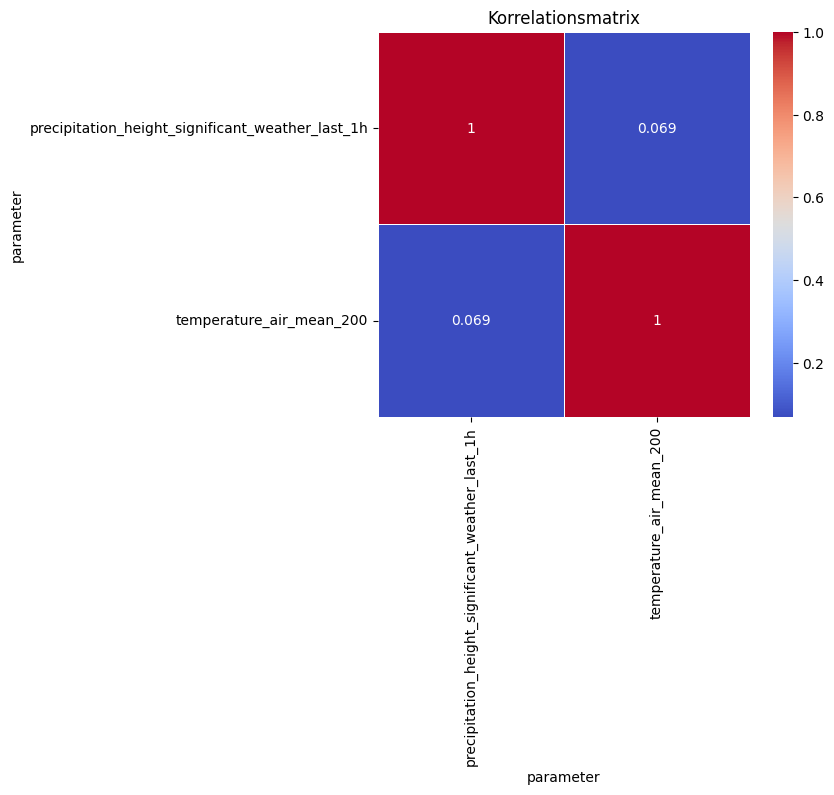

In [25]:
# Korrelation zwischen Temperatur und Niederschlag pro Standort berechnen
correlation_data = data.pivot_table(index='recorded_at', columns='parameter', values='value')
correlation = correlation_data.corr()
print("Korrelation zwischen Temperatur und Niederschlag:")
print(correlation)

# Visualisierung der Korrelation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Beispiel: Vorhersage für Temperatur basierend auf station_id und forecast_time
temp_data = data[data['parameter'] == 'temperature'].copy()

# Feature-Engineering: Zeitspalten extrahieren
temp_data['hour'] = temp_data['recorded_at'].dt.hour
temp_data['day'] = temp_data['recorded_at'].dt.day
temp_data['month'] = temp_data['recorded_at'].dt.month
temp_data['year'] = temp_data['recorded_at'].dt.year

# Definiere Features und Zielvariable
X = temp_data[['station_id', 'hour', 'day', 'month', 'year']]
y = temp_data['value']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage und Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) der Temperaturvorhersage: {mse}')

# Vergleich von Vorhersage und tatsächlichen Werten plotten
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Tatsächliche Werte', color='blue')
plt.plot(y_pred[:50], label='Vorhergesagte Werte', color='orange')
plt.legend()
plt.title('Vergleich von Vorhersage und tatsächlichen Temperaturwerten')
plt.xlabel('Beispiele')
plt.ylabel('Temperatur')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:


# Korrelationen zwischen numerischen Variablen analysieren
print("\nKorrelationsmatrix:")
data.corr()



Korrelationsmatrix:


ValueError: could not convert string to float: '2024-05-12 15:00:17.390012'

In [ ]:

# Heatmap der Korrelationen plotten
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelationsmatrix Heatmap")
plt.show()


In [ ]:

# Ausreißererkennung mit Boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f"Boxplot für {column}")
plt.tight_layout()
plt.show()
